<a href="https://colab.research.google.com/github/PabloNatB/Modulo-5-BEDU/blob/main/Student_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’




In [3]:
install.packages("graphics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is a base package, and should not be updated”


In [4]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [5]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
par(cex.axis = 3, cex.lab = 3)

In [7]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [8]:
# Ignore warnings
options(warn=-1)



In [9]:
# Set plot size
options(repr.plot.width=15, repr.plot.height=10)



In [10]:
# Read the CSV file
url <- "https://raw.githubusercontent.com/PabloNatB/Modulo-5-BEDU/main/Student_Performance.csv"
df <- read.csv(url)


In [11]:
# Display the first few rows of the dataframe
head(df)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [12]:
# Display information about the dataframe
str(df)


'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


In [13]:

# Drop duplicates
cat("before duplicates dropped: ", nrow(df), "\n")
df <- df[!duplicated(df), ]
cat("after duplicates dropped: ", nrow(df), "\n")



before duplicates dropped:  10000 
after duplicates dropped:  9873 


In [14]:
# Extract the 'Performance Index' column
response <- df$`Performance.Index`
cat("Response variable type: ", typeof(response), "\n")



Response variable type:  double 


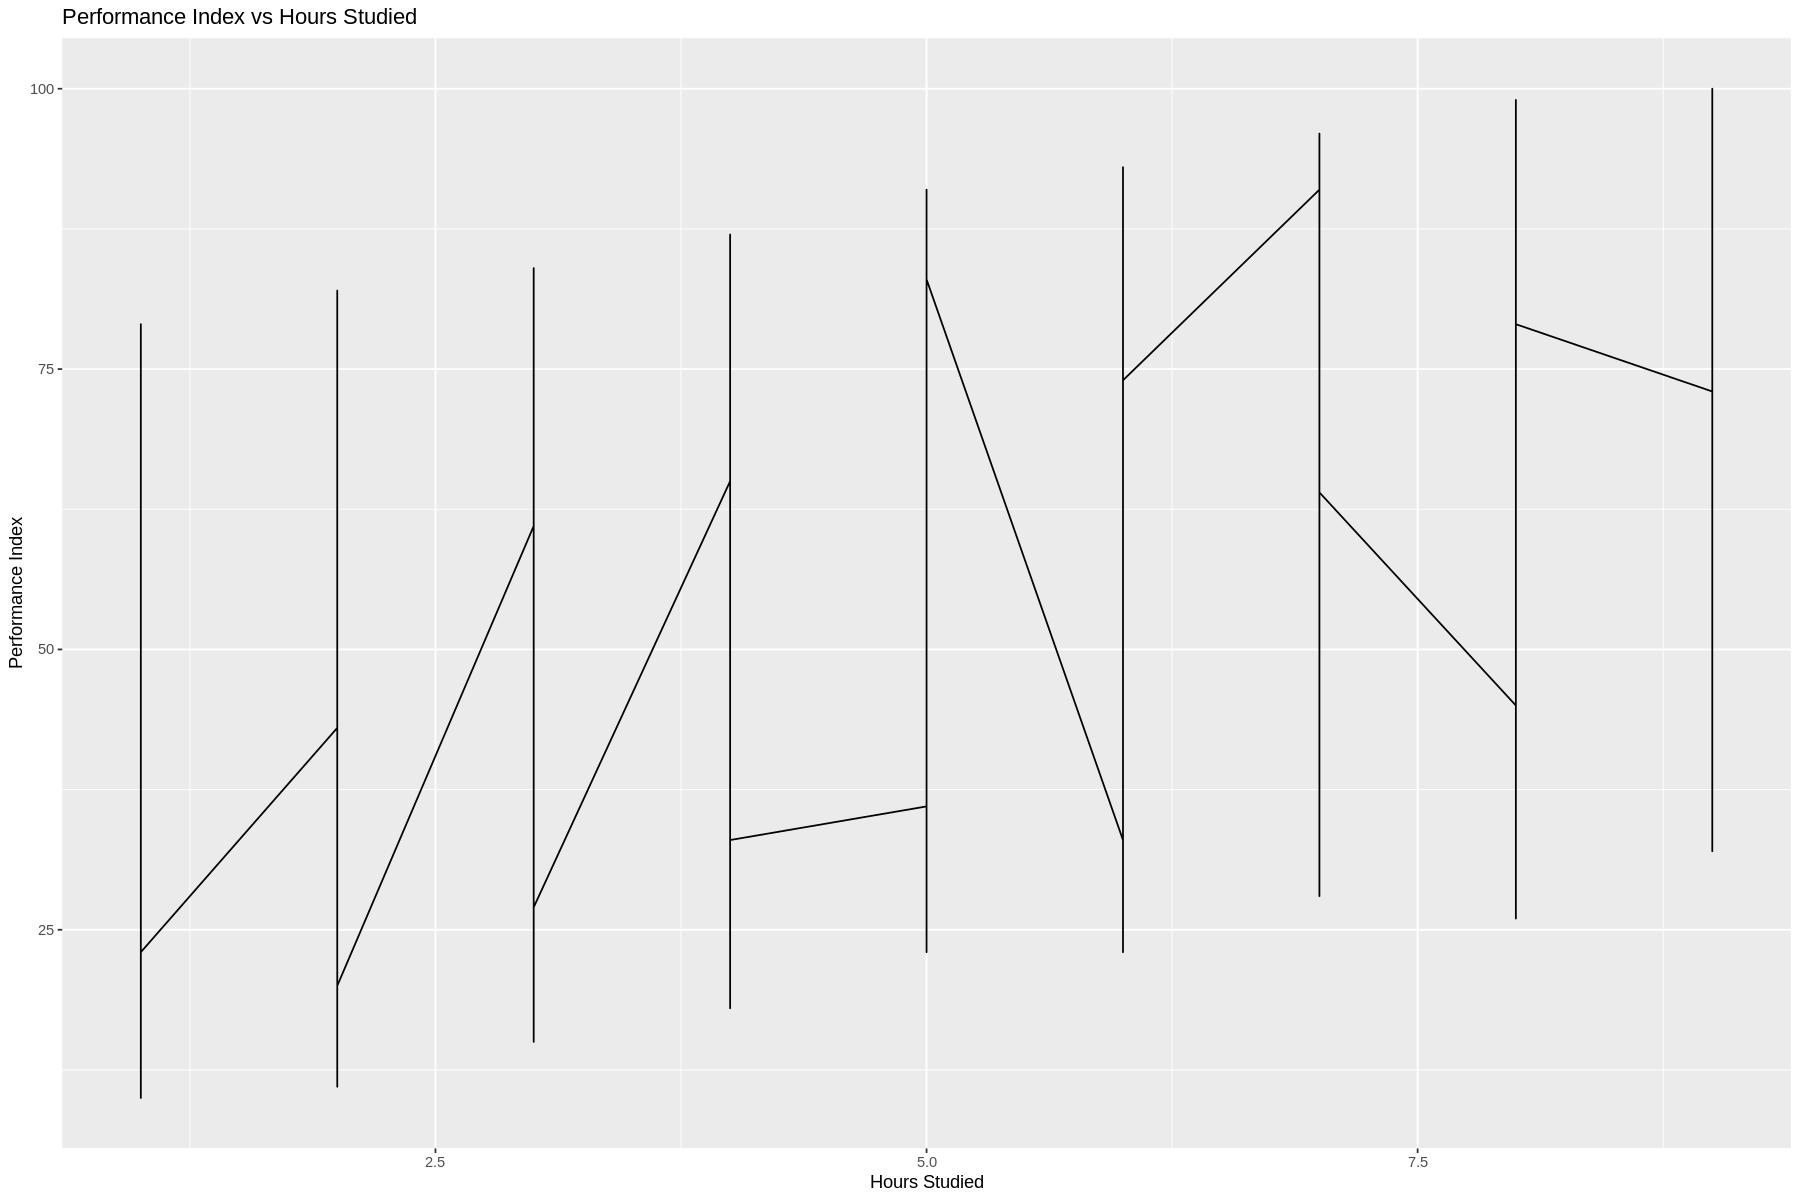

In [15]:
ggplot(df, aes(x = Hours.Studied, y = Performance.Index)) +
  geom_line() +
  xlab("Hours Studied") +
  ylab("Performance Index") +
  ggtitle("Performance Index vs Hours Studied")

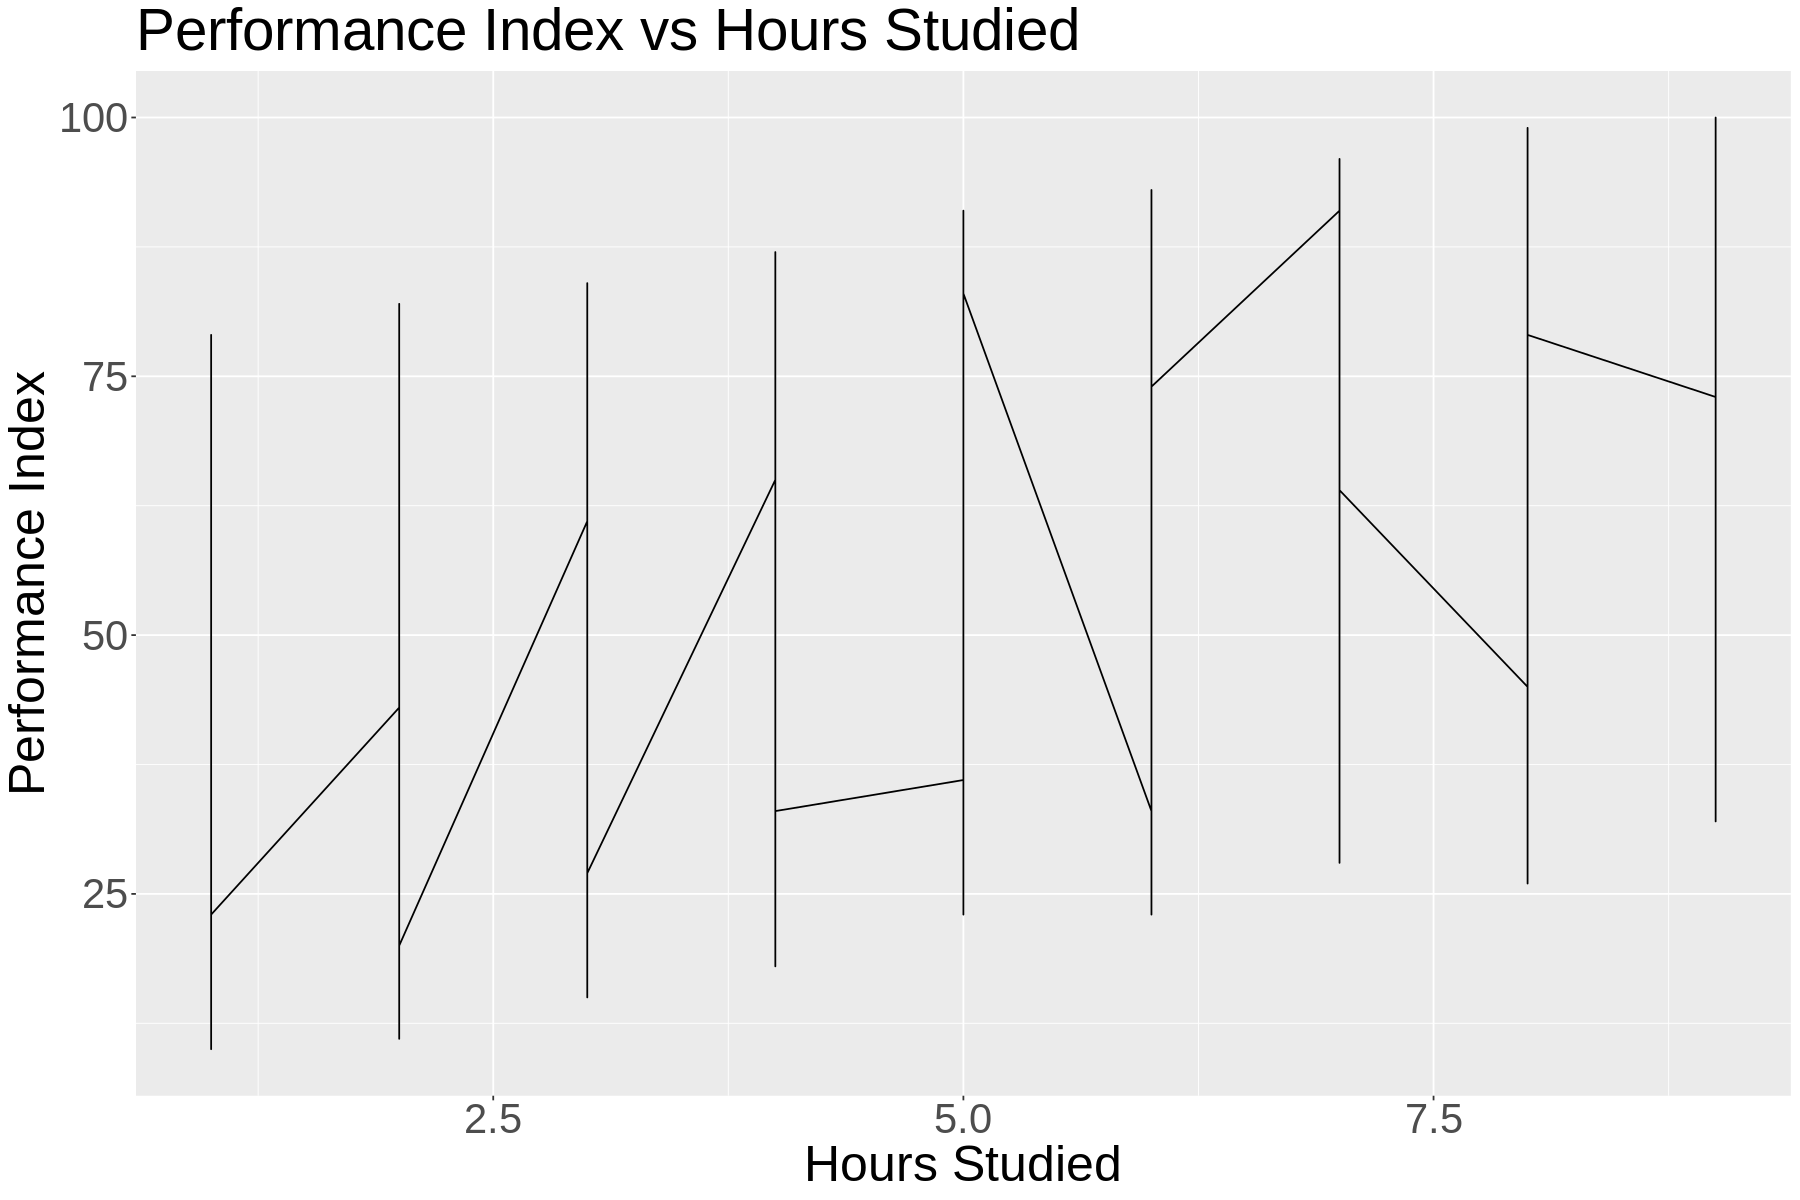

In [18]:
ggplot(df, aes(x = Hours.Studied, y = Performance.Index)) +
  geom_line() +
  xlab("Hours Studied") +
  ylab("Performance Index") +
  ggtitle("Performance Index vs Hours Studied") +
  theme(axis.title.x = element_text(size = 30),
        axis.title.y = element_text(size = 30),
        plot.title = element_text(size = 35),
        axis.text = element_text(size = 25))

Minimum Performance Index: 10 


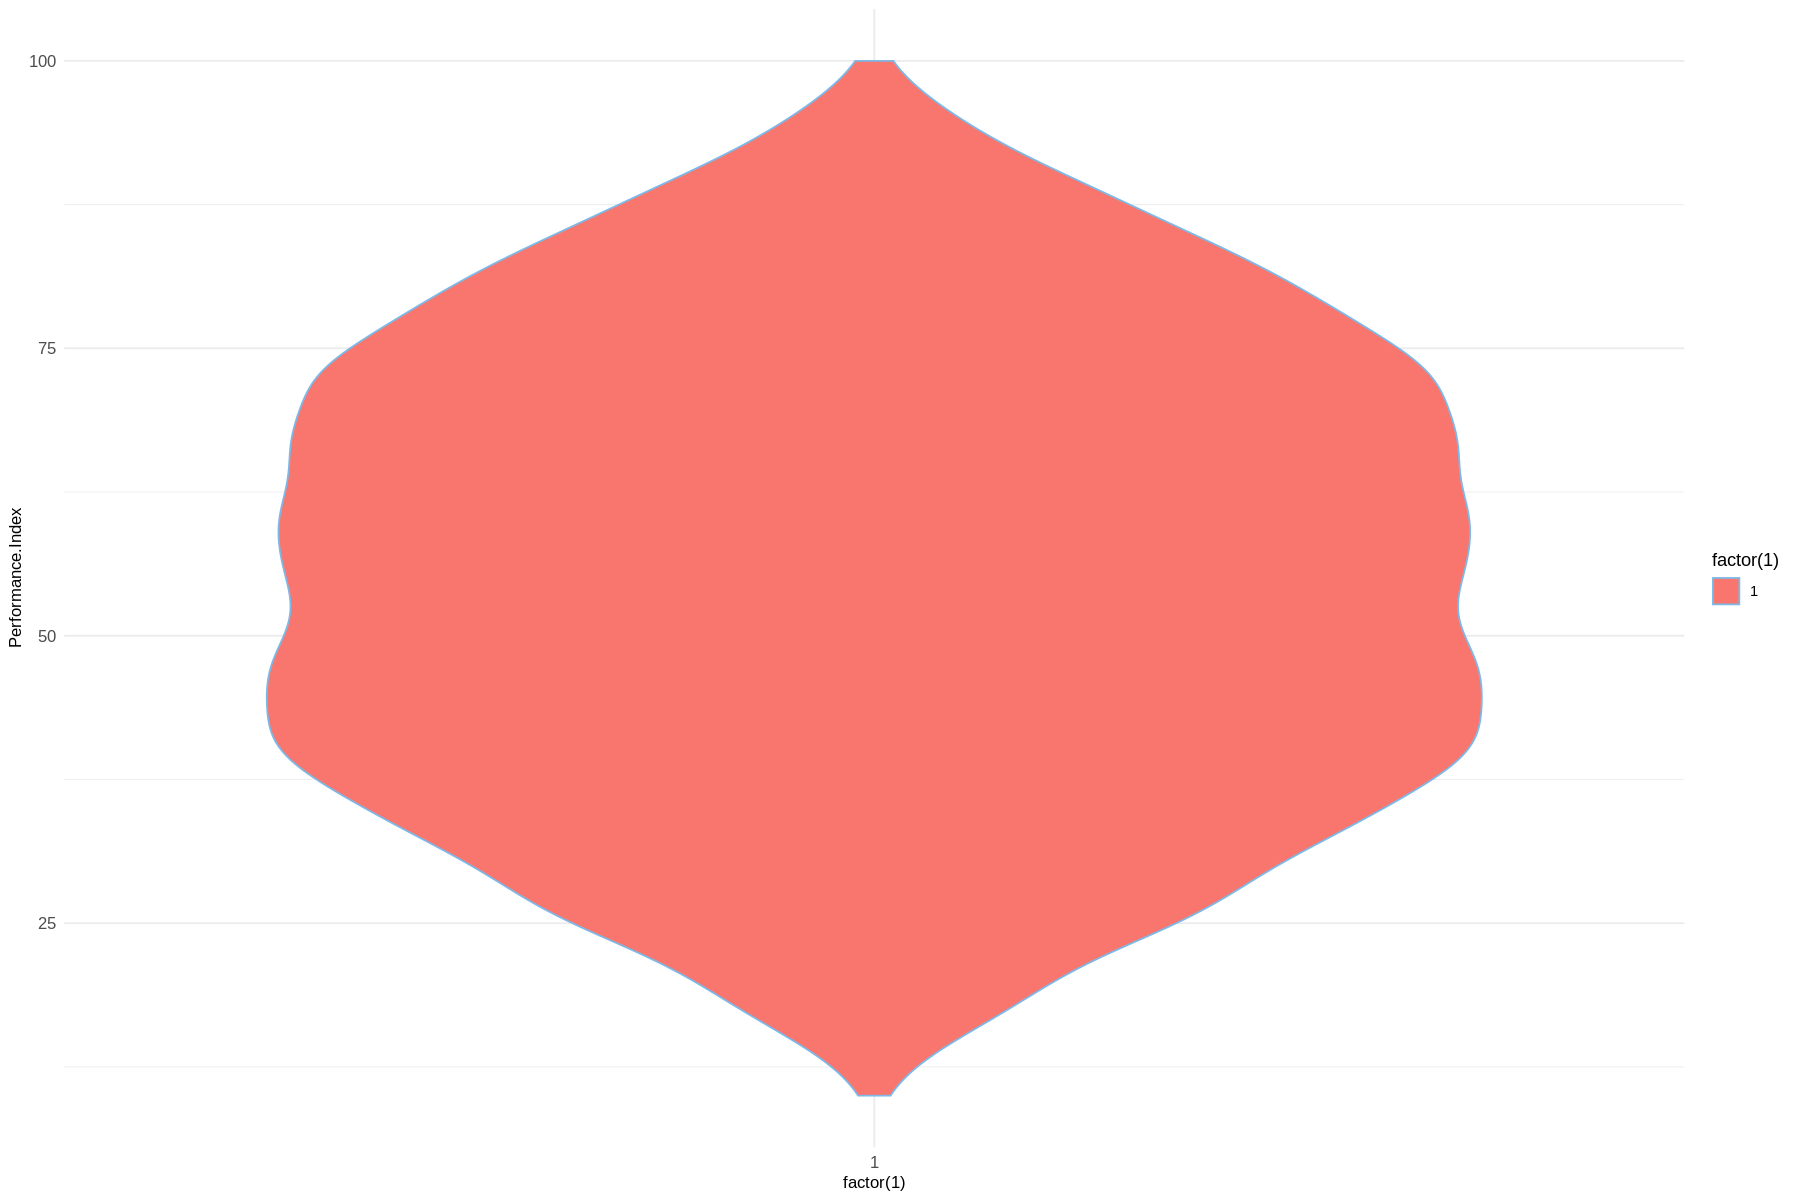

In [19]:

# Check the overall distribution of the response variable
library(ggplot2)

# Crea el objeto ggplot
violinplot <- ggplot(df, aes(x = factor(1), y = Performance.Index, fill = factor(1))) +
  geom_violin(color = '#7cb9e8') +
  theme_minimal() +
  theme(axis.text = element_text(size = 10),    # Tamaño del texto en los ejes
        axis.title = element_text(size = 10))   # Tamaño del texto de las etiquetas de los ejes

# Imprime el gráfico
print(violinplot)

# Imprime la información adicional
cat("Minimum Performance Index:", min(df$Performance.Index), "\n")







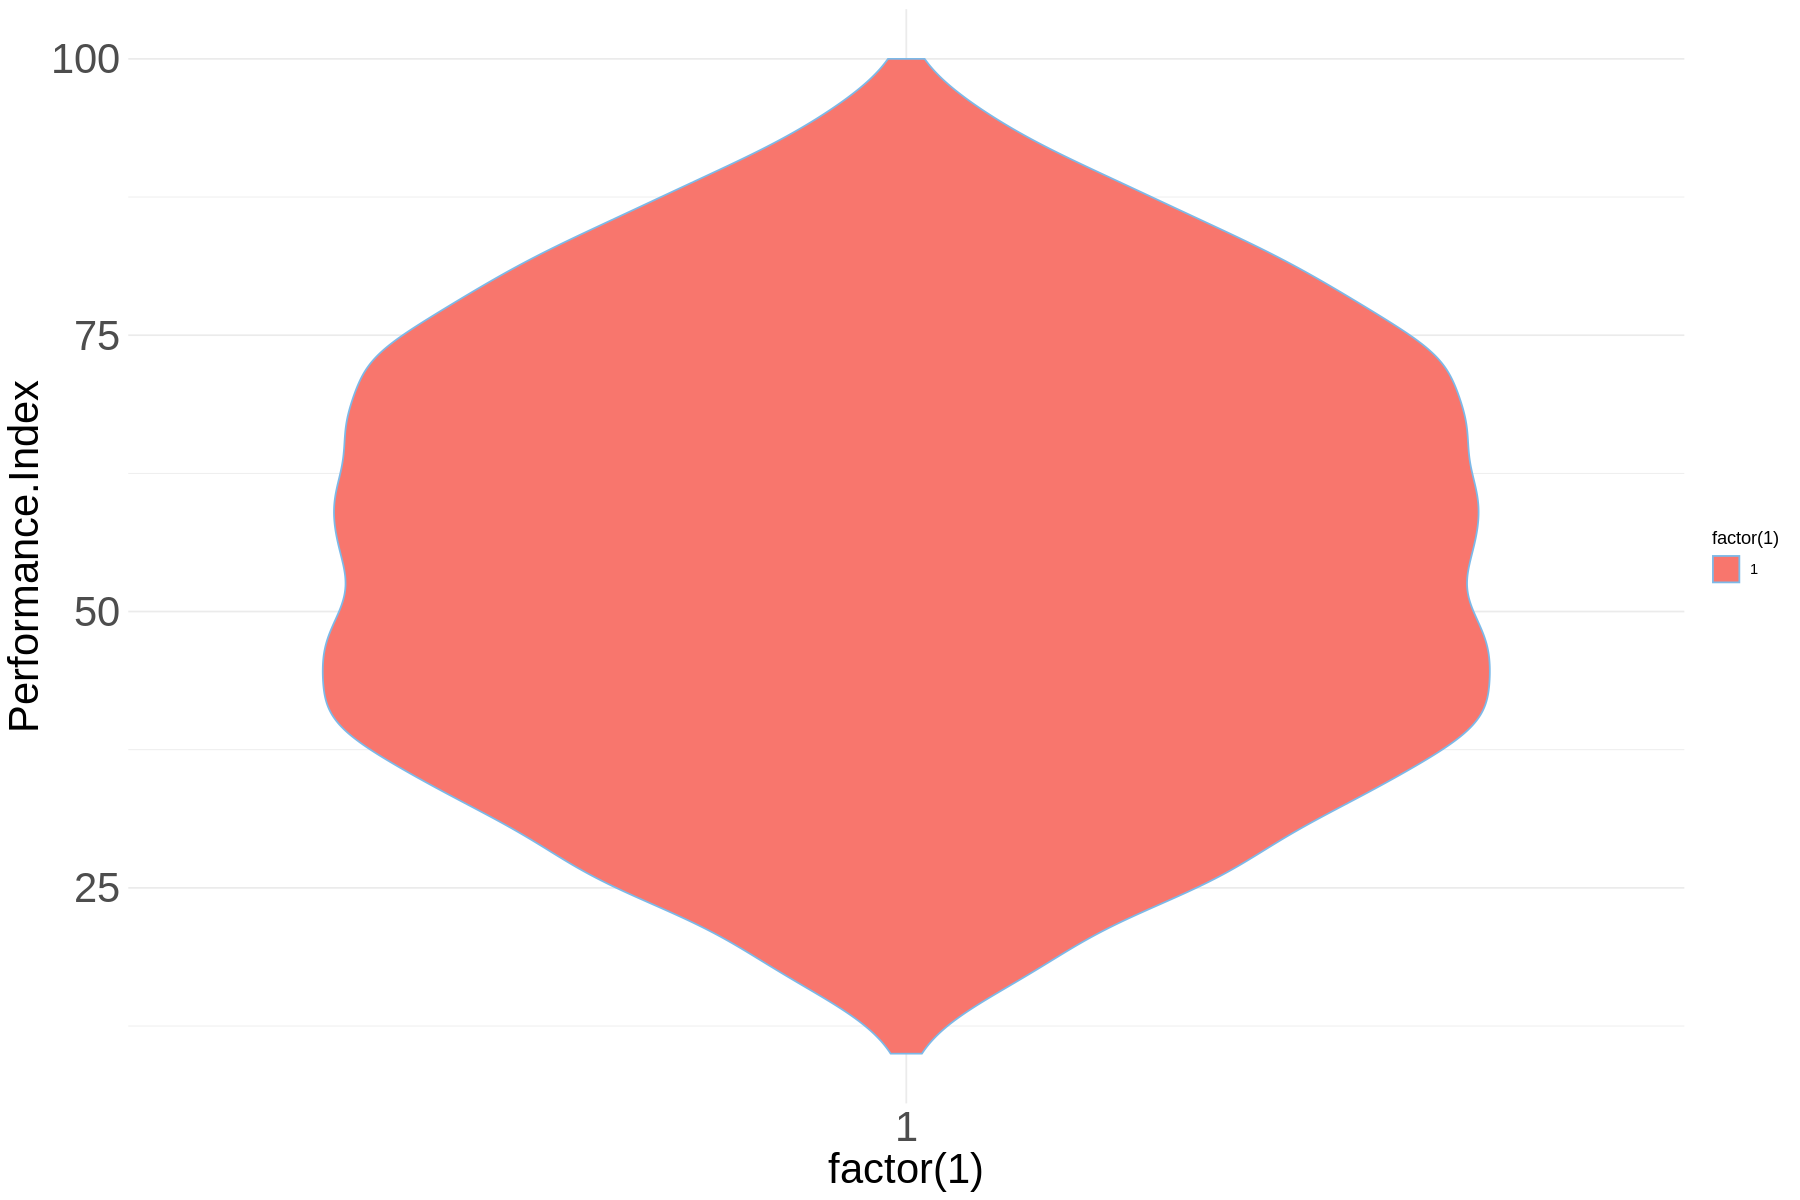

In [21]:
violinplot <- ggplot(df, aes(x = factor(1), y = Performance.Index, fill = factor(1))) +
  geom_violin(color = '#7cb9e8') +
  theme_minimal() +
  theme(axis.text = element_text(size = 25),    # Tamaño del texto en los ejes
        axis.title = element_text(size = 25),   # Tamaño del texto de las etiquetas de los ejes
        plot.title = element_text(size = 30))   # Tamaño del texto del título

# Imprime el gráfico
print(violinplot)

In [22]:
# Explore the 'Hours Studied' variable
X_hours_studied <- df$`Hours.Studied`
cat("Variable type: ", typeof(X_hours_studied), "\n")
cat("Unique values: ", unique(X_hours_studied), "\n")


Variable type:  integer 
Unique values:  7 4 8 5 3 6 2 1 9 


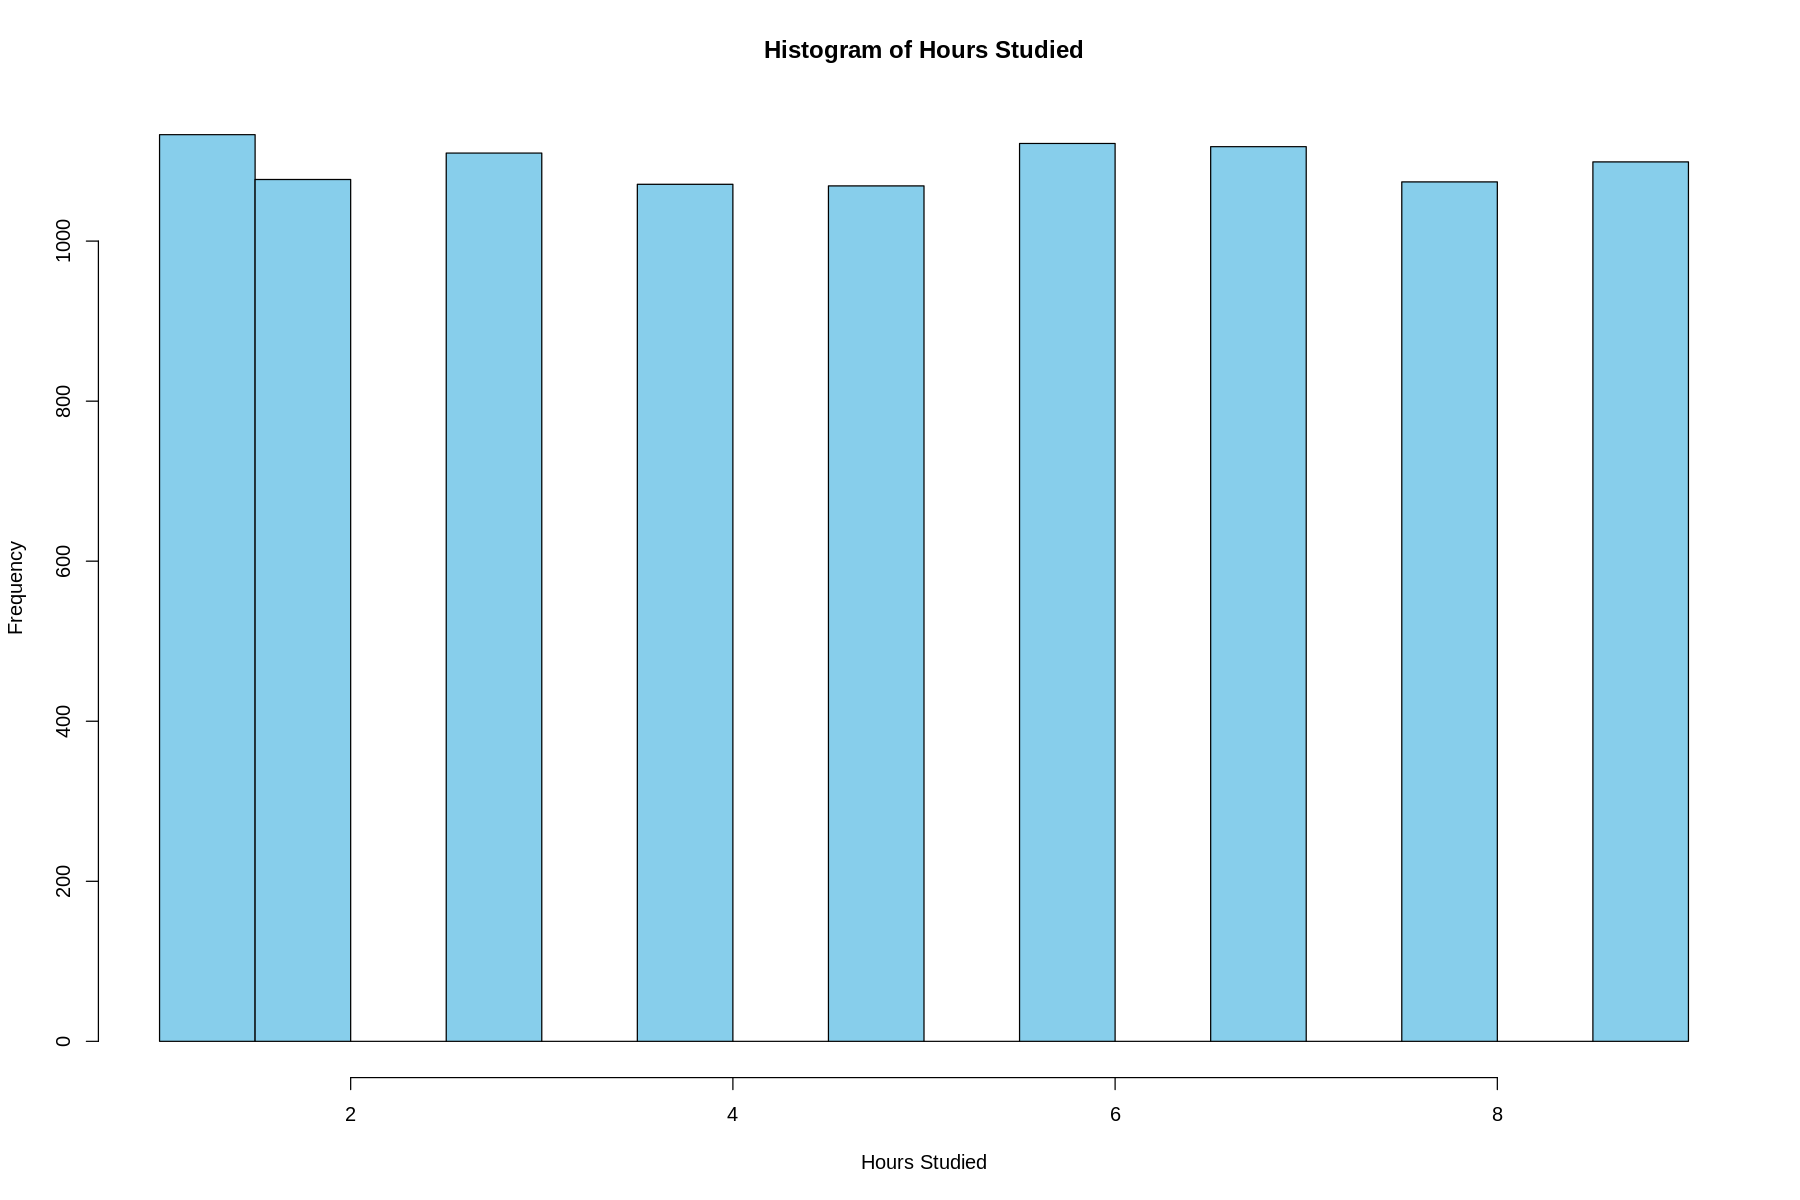

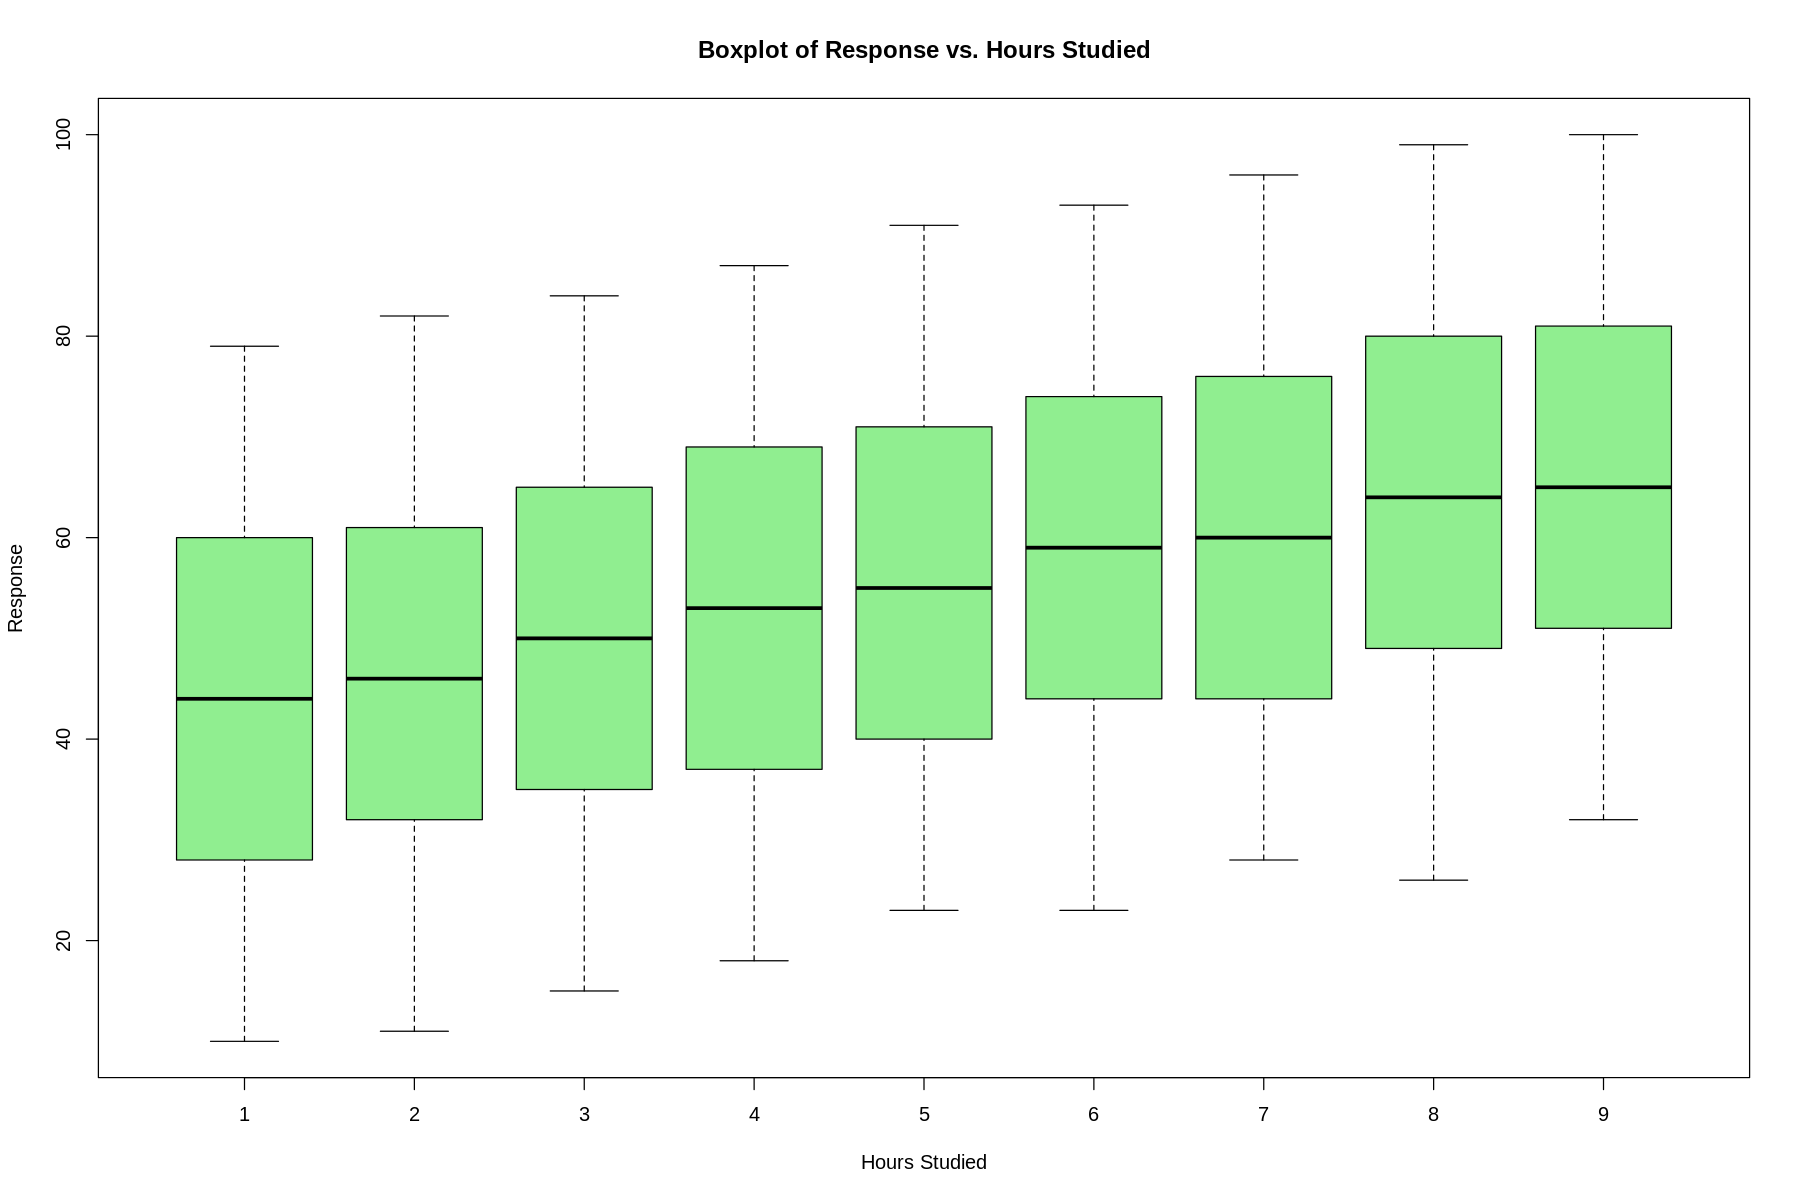

In [23]:
## Histogram del las Horas de Estudio
hist(df$Hours.Studied,
     main = "Histogram of Hours Studied",
     xlab = "Hours Studied",
     col = "skyblue",
     border = "black")

## Boxplot de Respuestas vs. Horas de Estudio
boxplot(Performance.Index ~ Hours.Studied,
        data = df,
        main = "Boxplot of Response vs. Hours Studied",
        xlab = "Hours Studied",
        ylab = "Response",
        col = "lightgreen",
        border = "black")





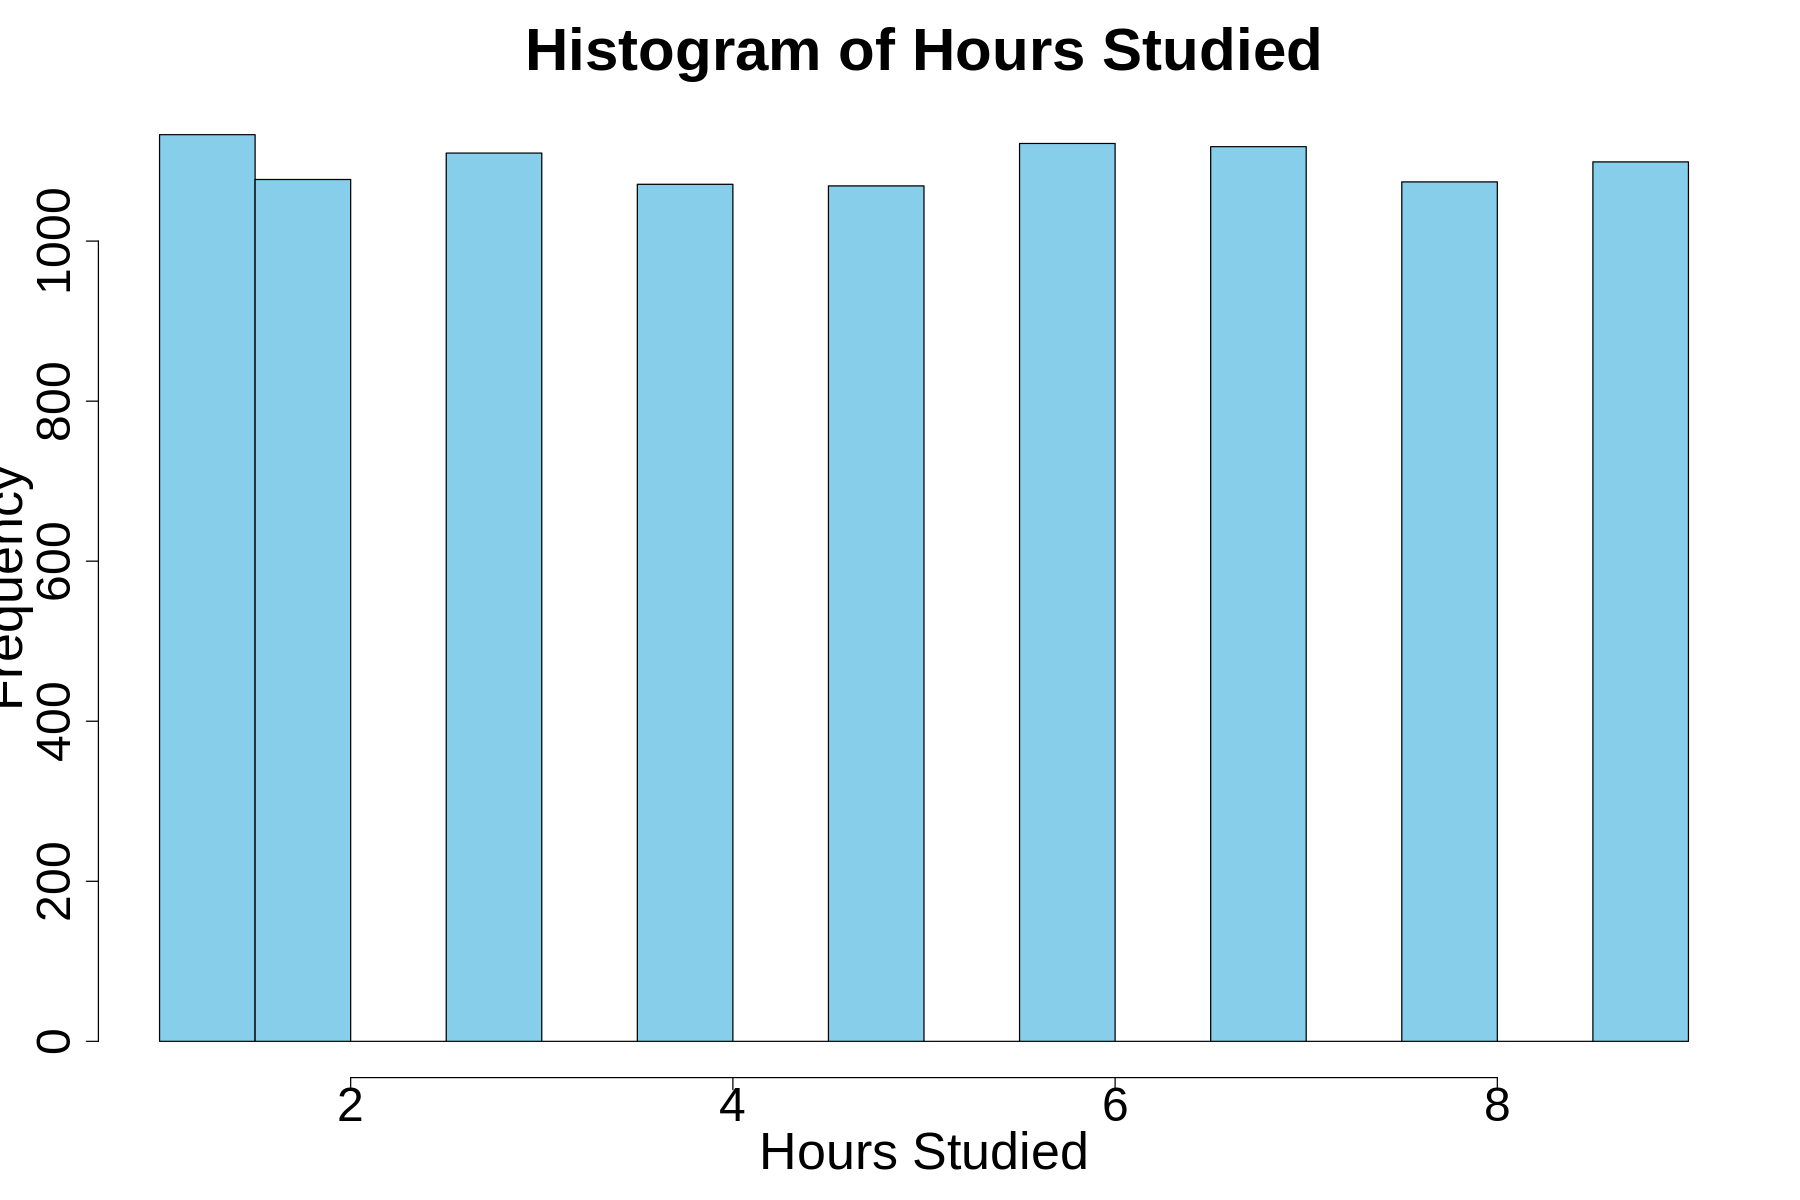

In [25]:
hist(df$Hours.Studied,
     main = "Histogram of Hours Studied",
     xlab = "Hours Studied",
     col = "skyblue",
     border = "black",
     cex.main = 3,    # Tamaño del título
     cex.lab = 2.6,     # Tamaño de las etiquetas de los ejes
     cex.axis = 2.4)    # Tamaño de los números en los ejes

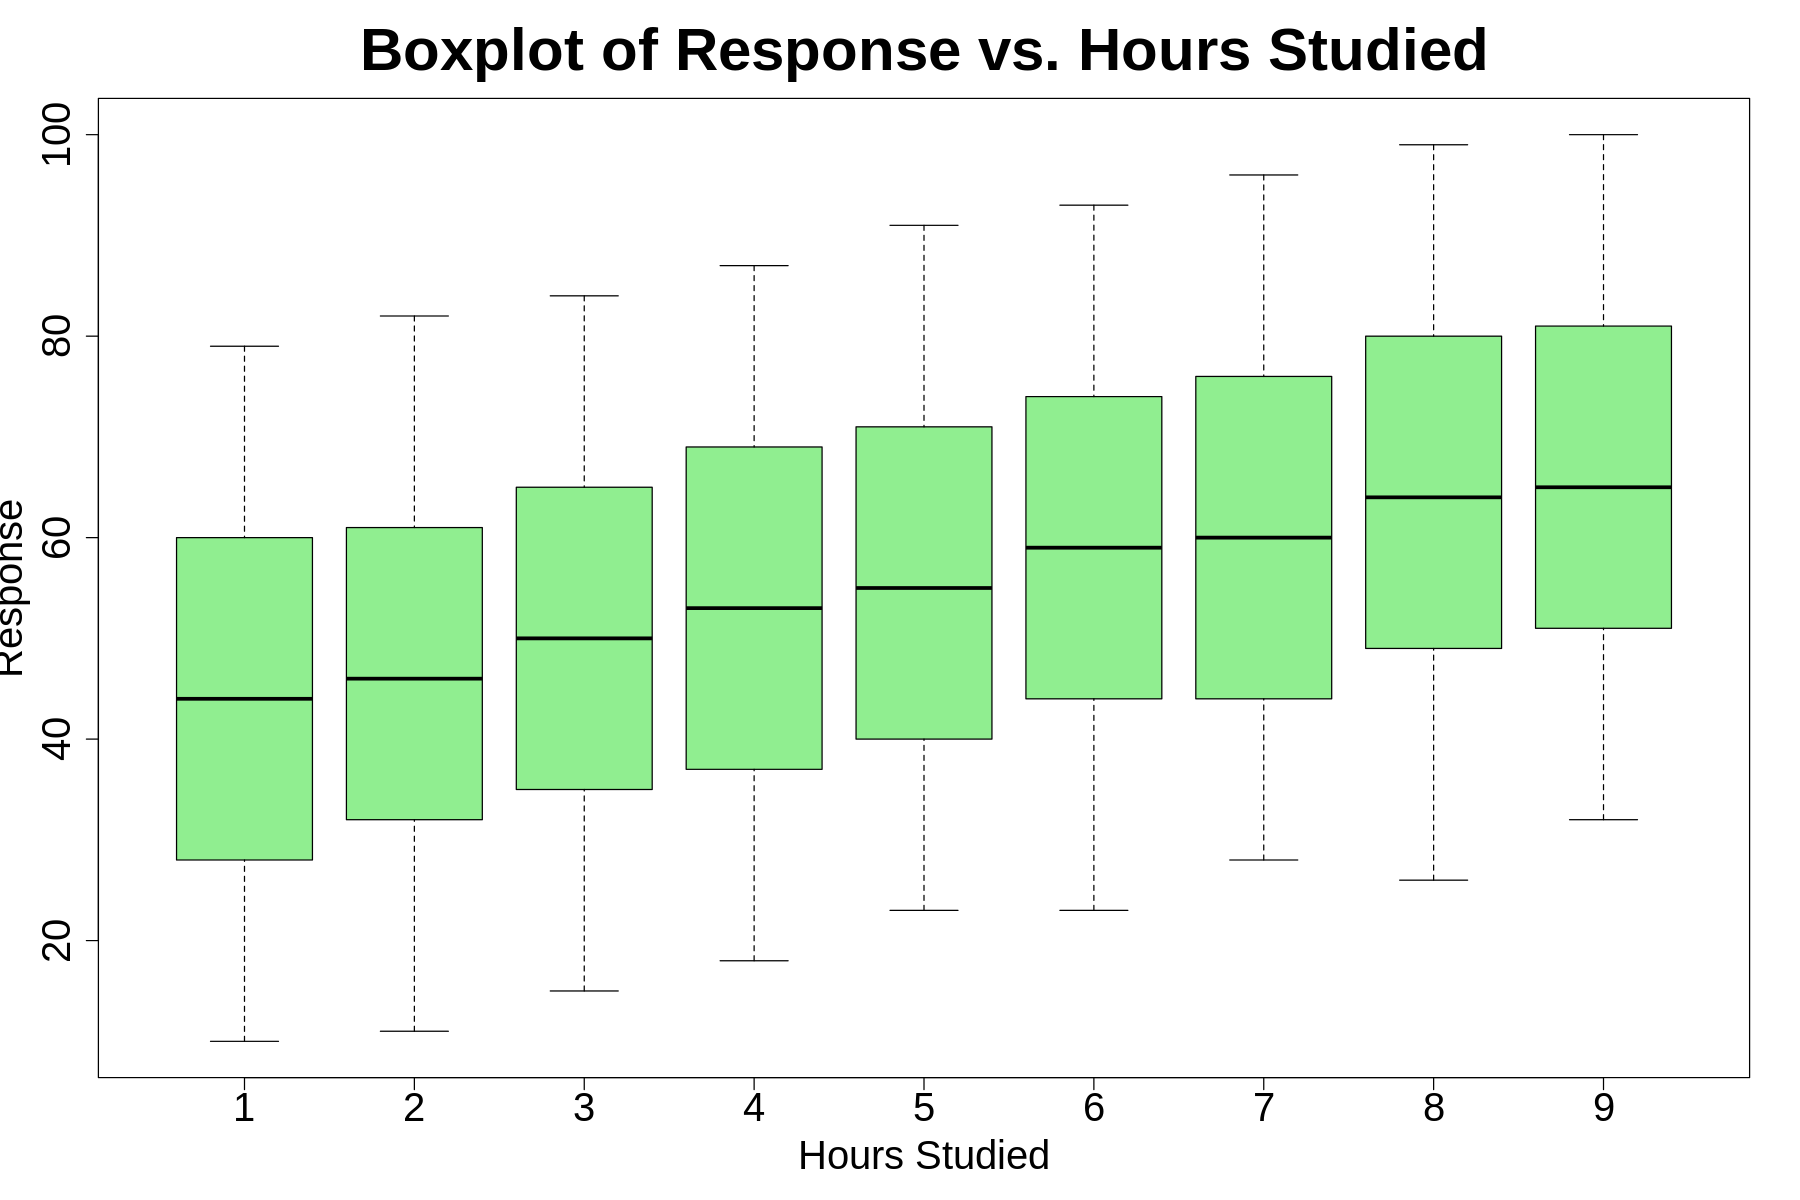

In [30]:
boxplot(Performance.Index ~ Hours.Studied,
        data = df,
        main = "Boxplot of Response vs. Hours Studied",
        xlab = "Hours Studied",
        ylab = "Response",
        col = "lightgreen",
        border = "black",
        cex.main = 3,    # Tamaño del título
        cex.lab = 2,     # Tamaño de las etiquetas de los ejes
        cex.axis = 2)    # Tamaño de los números en los ejes

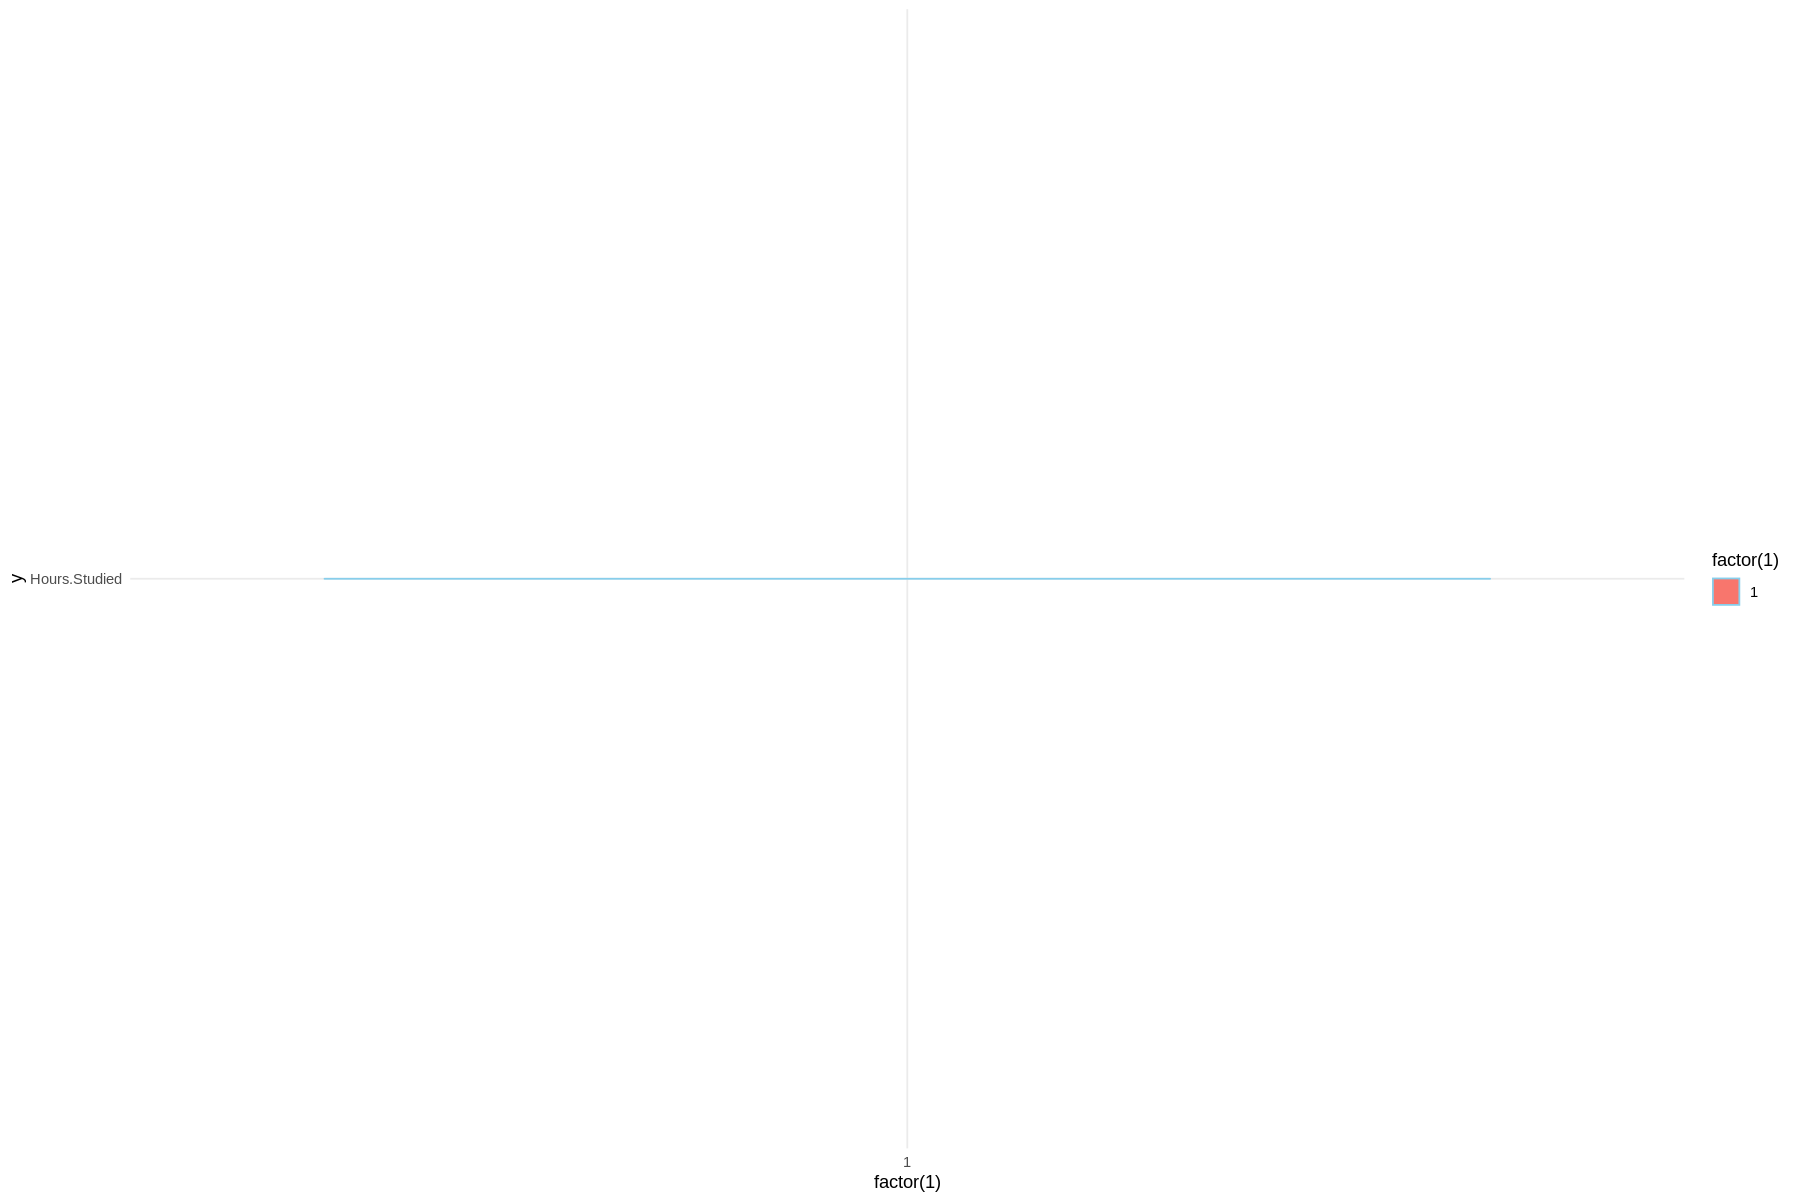

In [31]:
library(ggplot2)

# Plot violin plot for Hours.Studied
ggplot(df, aes(x = factor(1), y = "Hours.Studied", fill = factor(1))) +
  geom_violin(color = 'skyblue') +
  theme_minimal()




In [32]:

# Explore the 'Previous Scores' variable
X_previous_scores <- df$`Previous.Scores`
cat("Variable type: ", typeof(X_previous_scores), "\n")


Variable type:  integer 


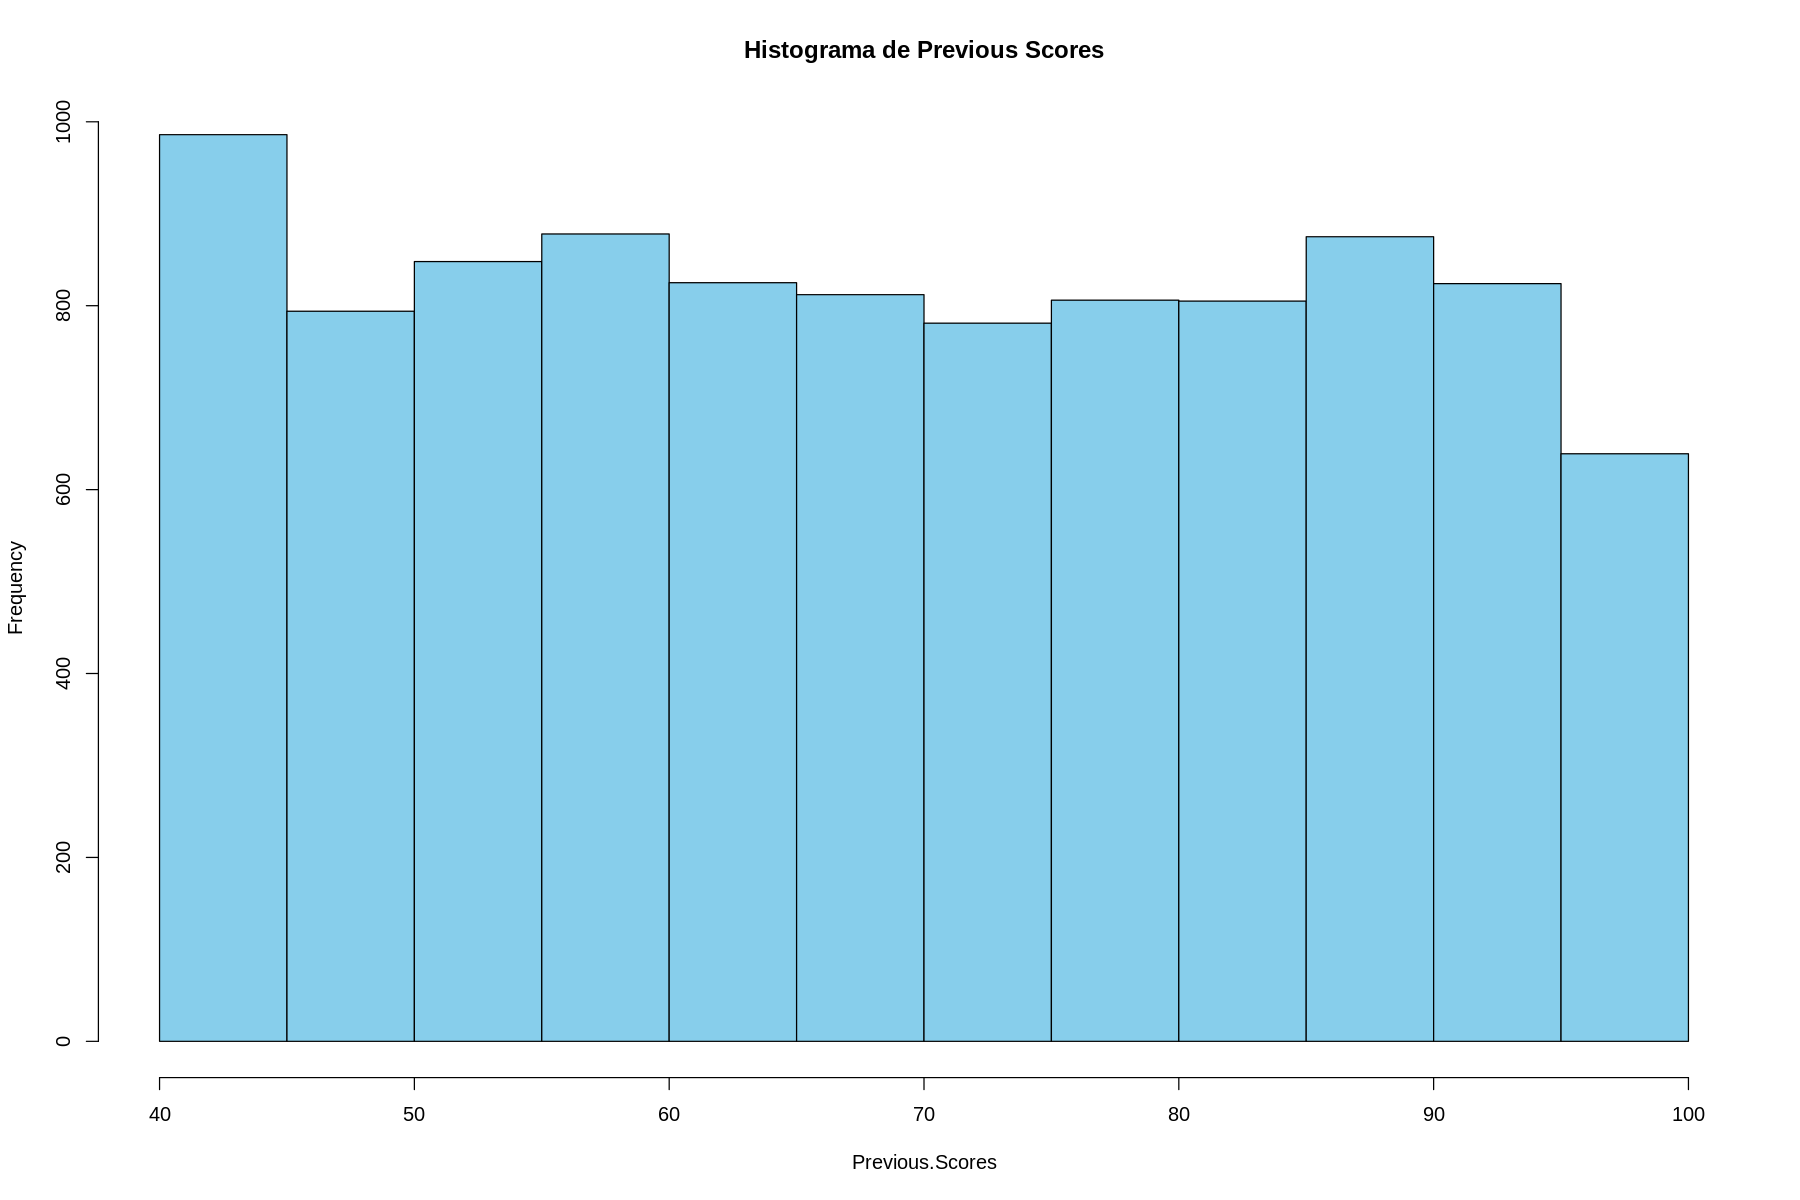

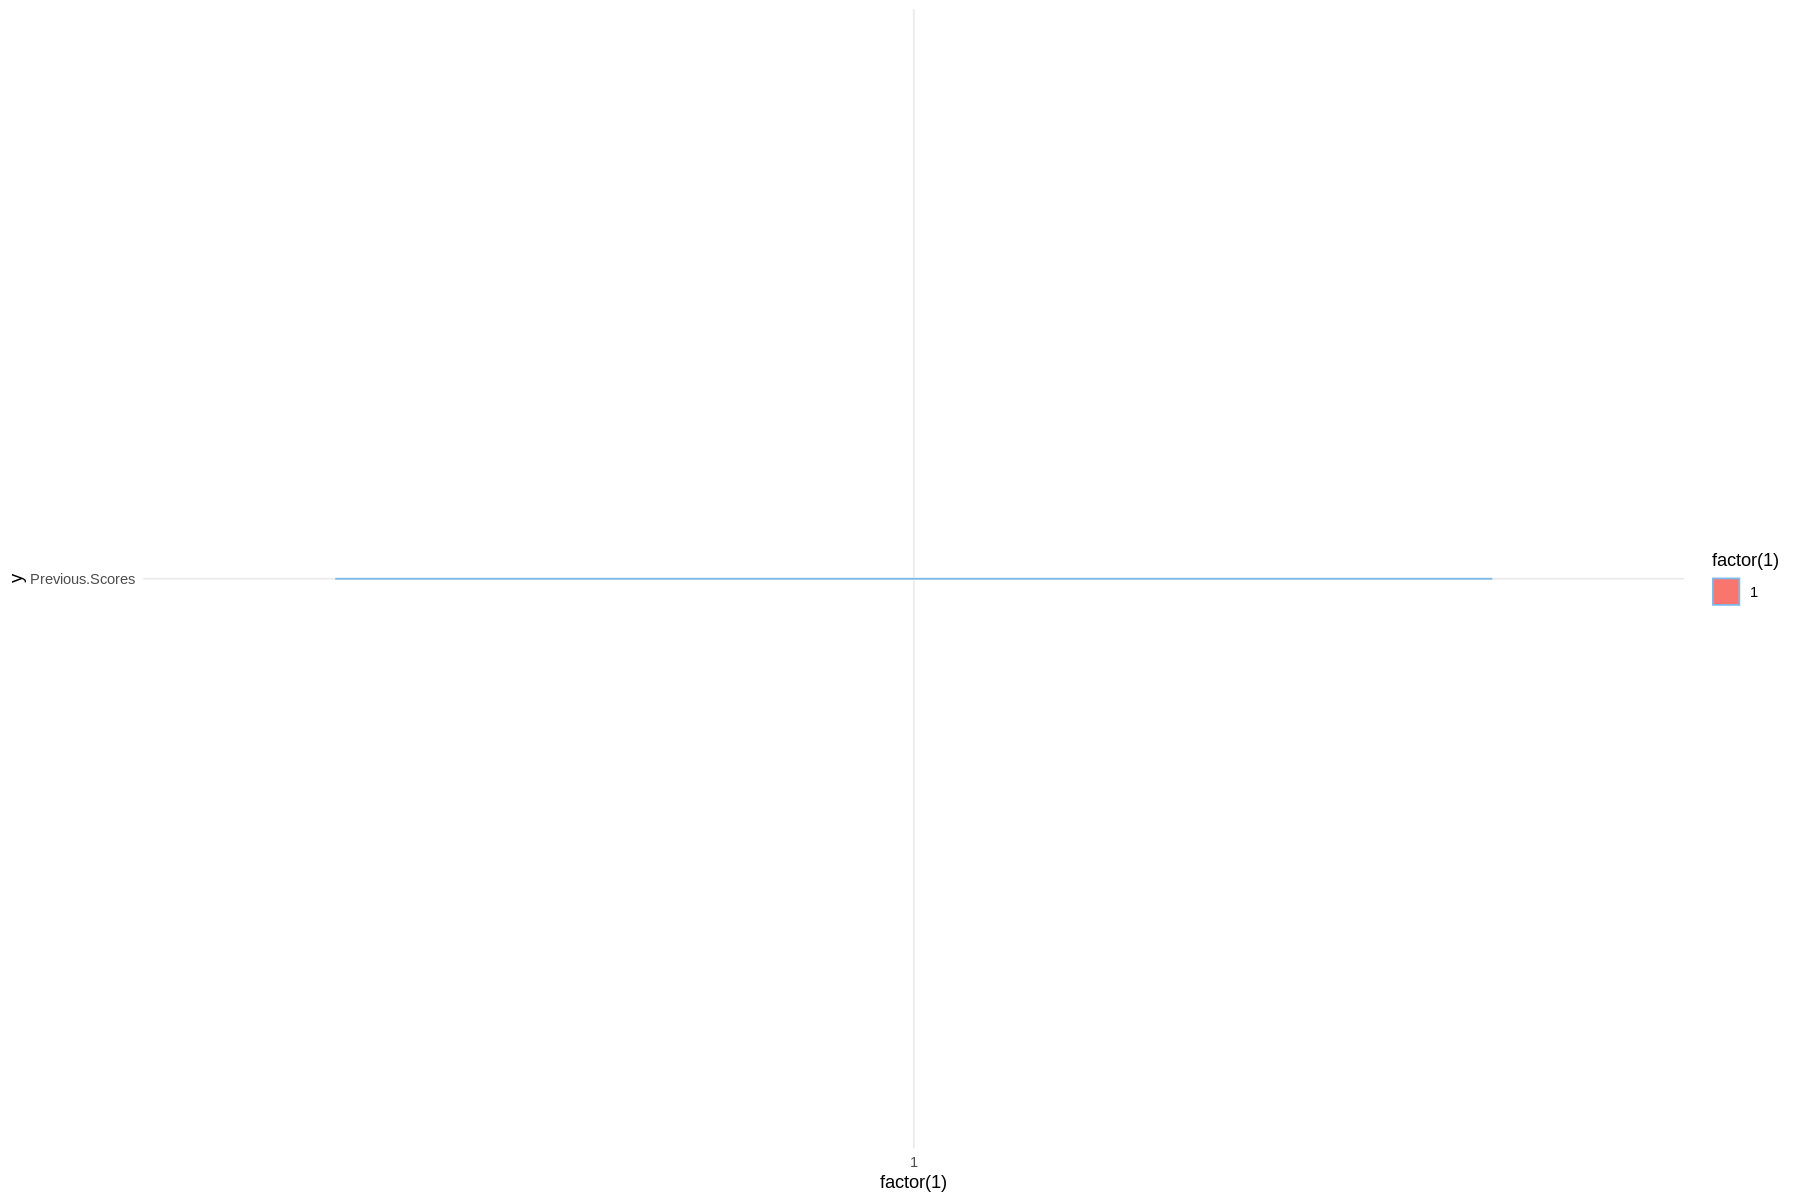

In [33]:
# Histograma de calificaciones previas
hist(df$Previous.Scores, main = "Histograma de Previous Scores", xlab = "Previous.Scores", col = "skyblue", border = "black")

# Gráfico de violín para calificaciones previas
library(ggplot2)
ggplot(df, aes(x = factor(1), y = "Previous.Scores", fill = factor(1))) +
  geom_violin(color = '#7cb9e8') +
  theme_minimal()




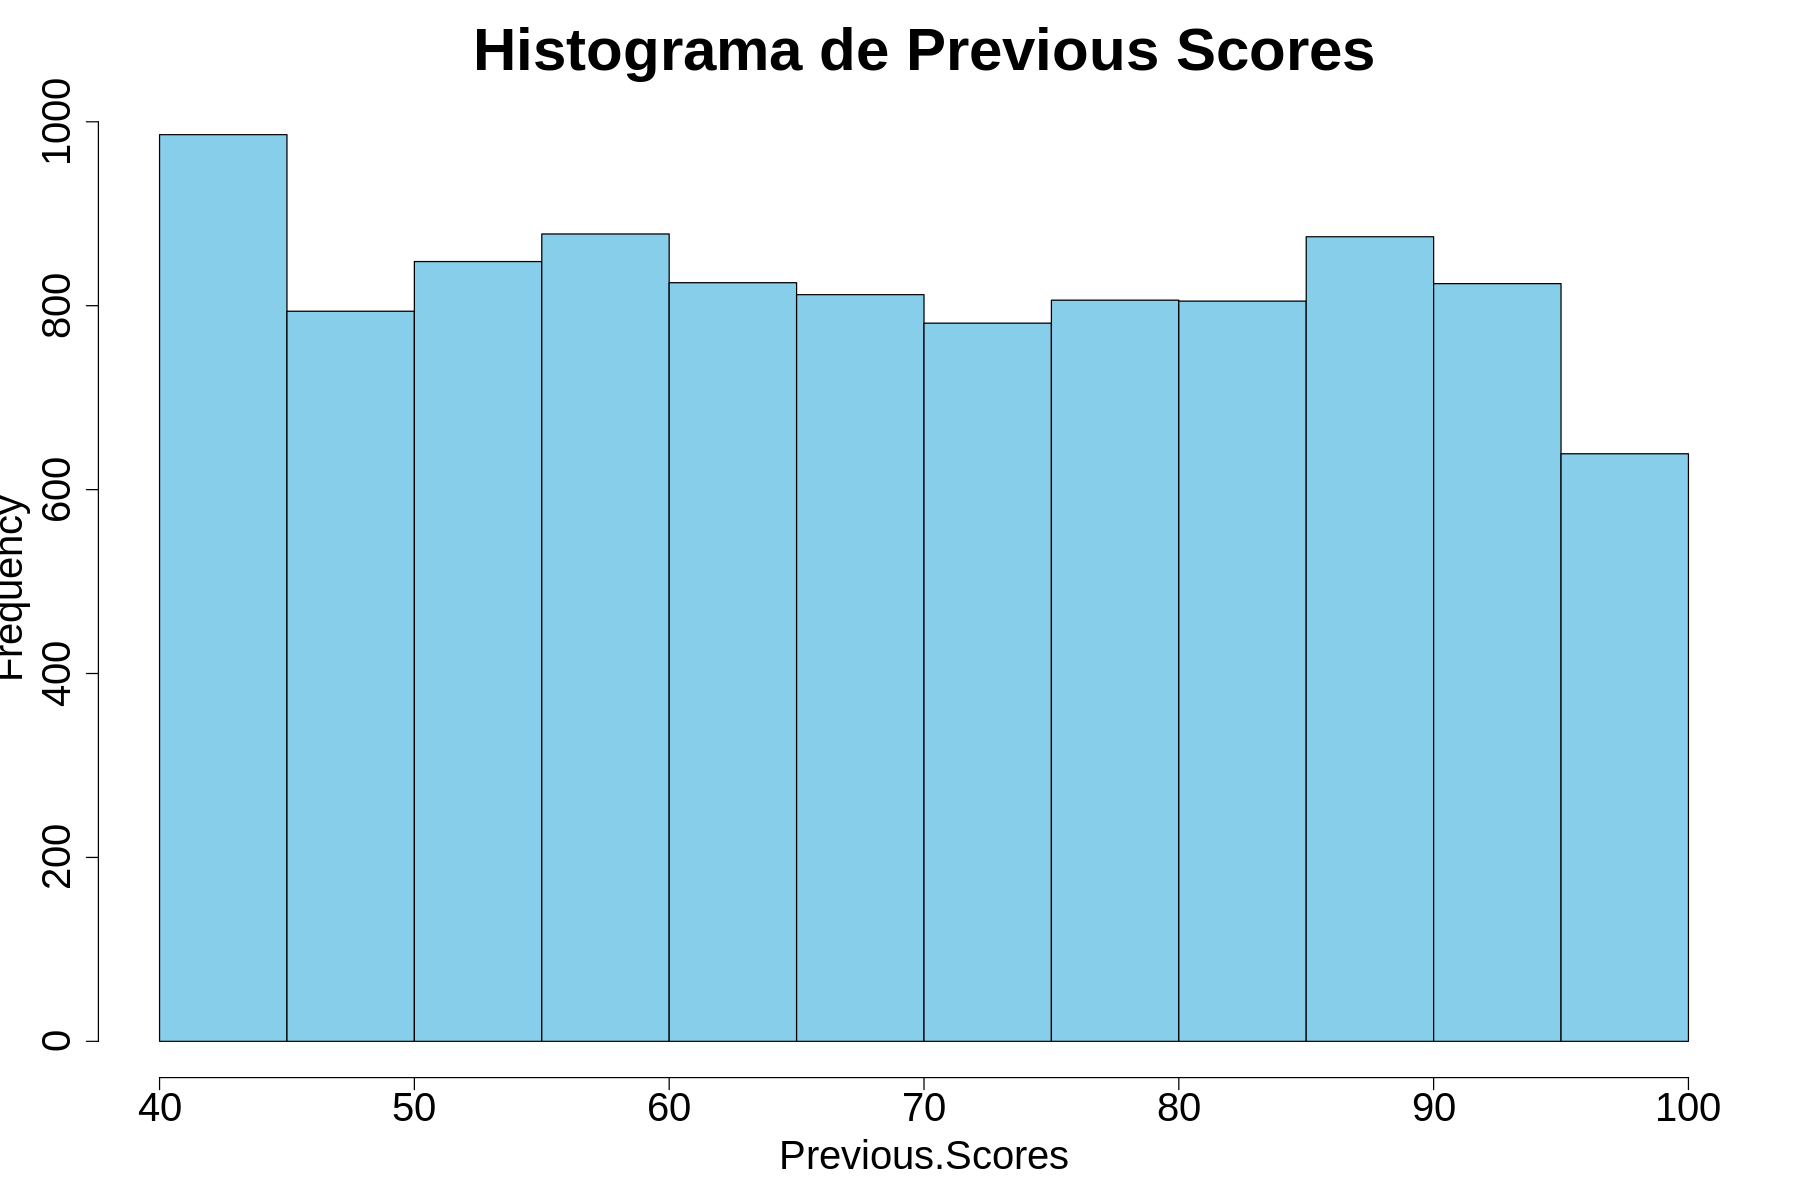

In [34]:
hist(df$Previous.Scores,
     main = "Histograma de Previous Scores",
     xlab = "Previous.Scores",
     col = "skyblue",
     border = "black",
     cex.main = 3,    # Tamaño del título
     cex.lab = 2,     # Tamaño de las etiquetas de los ejes
     cex.axis = 2)    # Tamaño de los números en los ejes

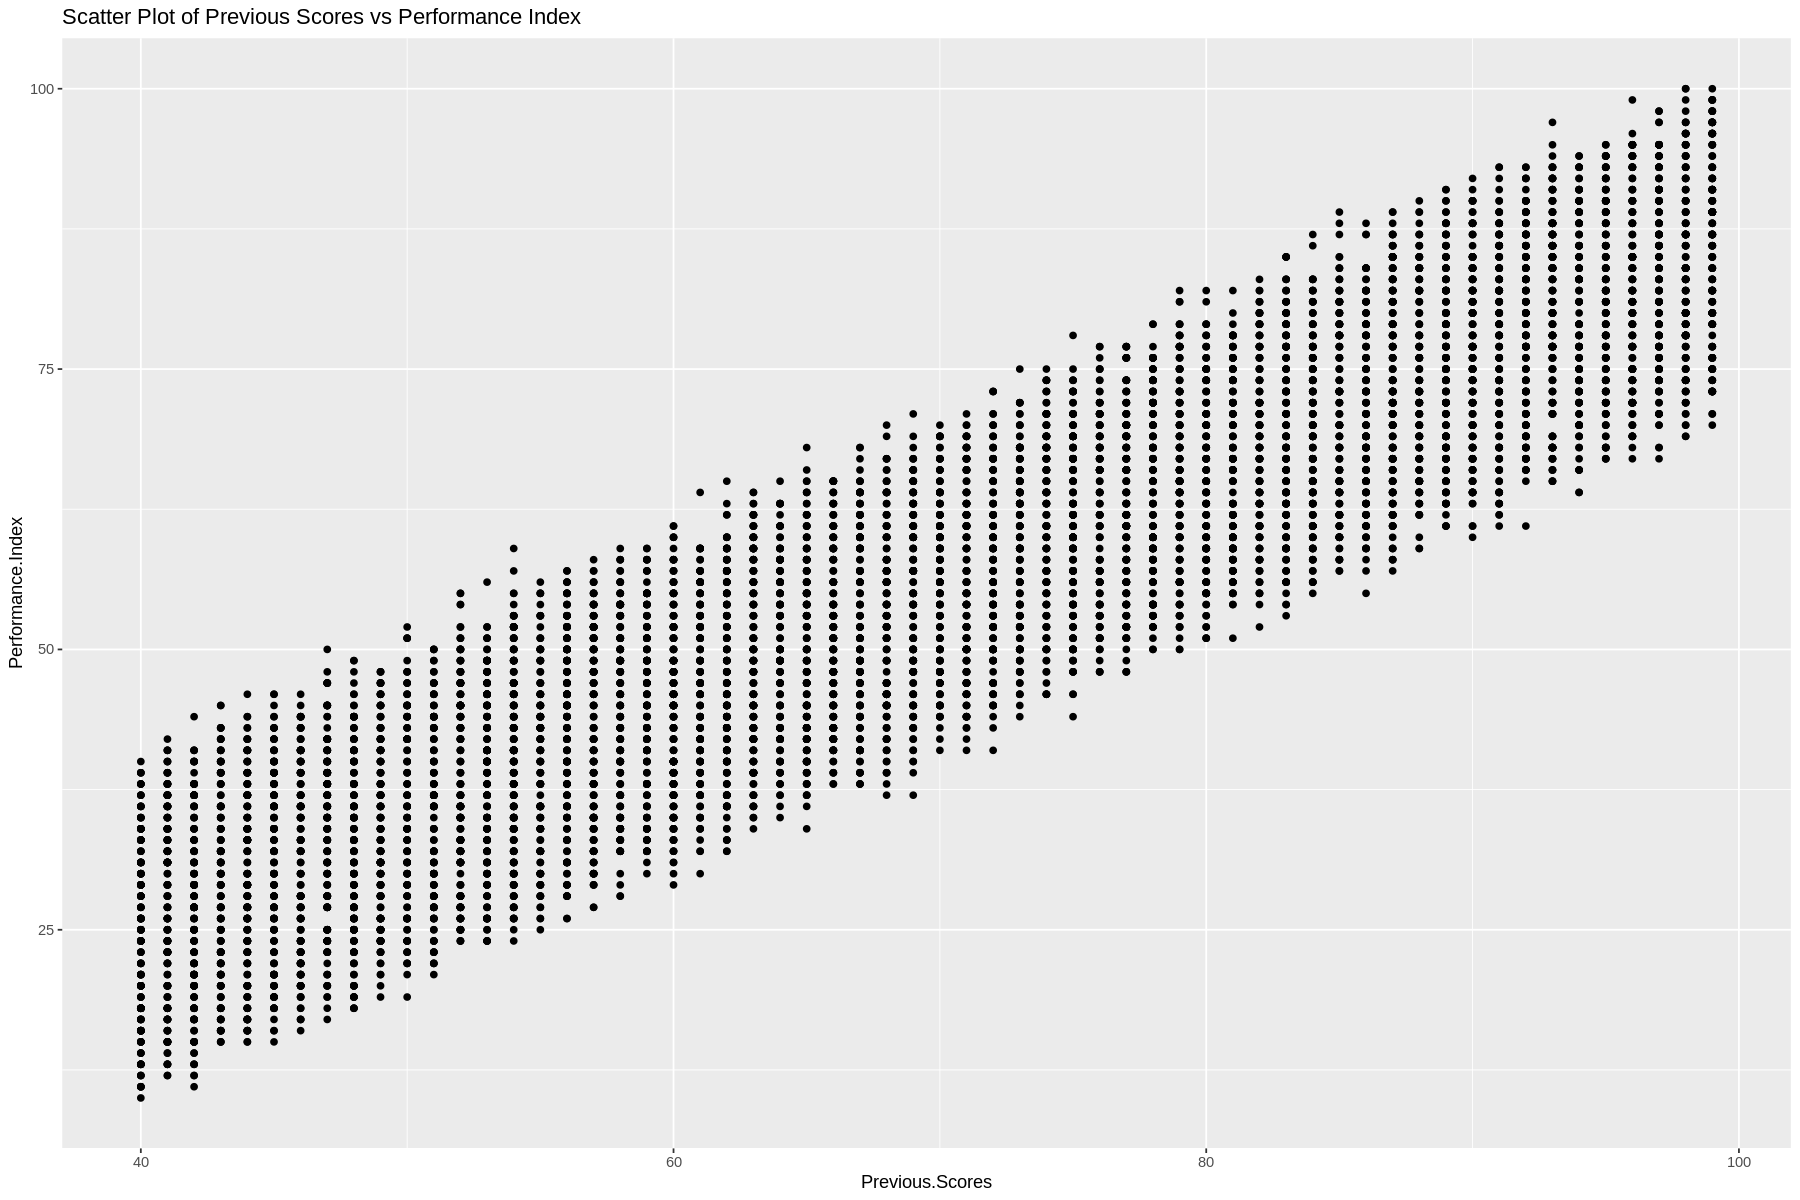

In [35]:
library(ggplot2)

# Scatter plot
ggplot(df, aes(x = Previous.Scores, y = Performance.Index)) +
  geom_point() +
  xlab("Previous.Scores") +
  ylab("Performance.Index") +
  ggtitle("Scatter Plot of Previous Scores vs Performance Index")




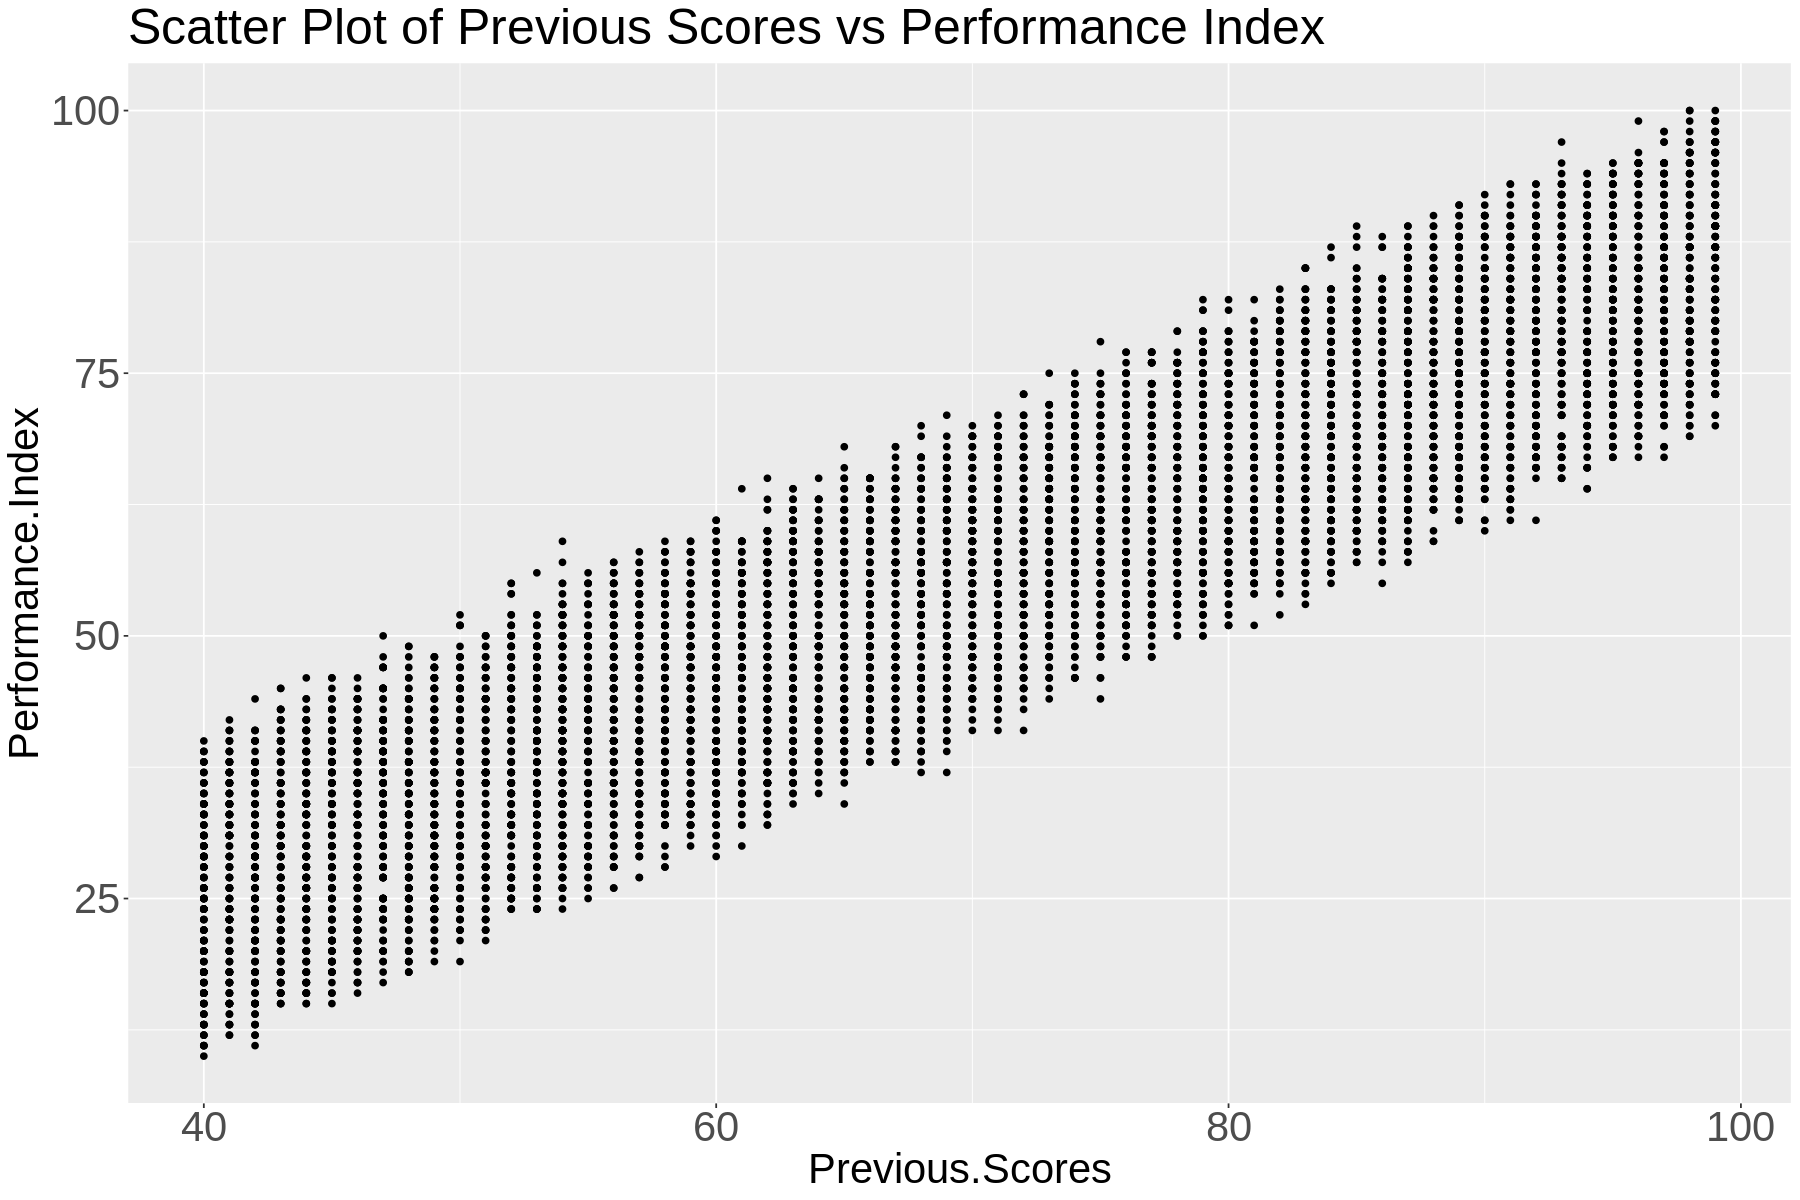

In [37]:
library(ggplot2)

# Scatter plot
ggplot(df, aes(x = Previous.Scores, y = Performance.Index)) +
  geom_point() +
  xlab("Previous.Scores") +
  ylab("Performance.Index") +
  ggtitle("Scatter Plot of Previous Scores vs Performance Index") +
  theme(axis.title.x = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        plot.title = element_text(size = 30),
        axis.text = element_text(size = 25))

In [38]:

# Explore the 'Extracurricular Activities' variable
X_extracurricular <- df$`Extracurricular.Activities`

cat("Tipo de variable: ", typeof(X_extracurricular), "\n")
head(X_extracurricular)


Tipo de variable:  character 


[1] "Yes" "No"  "Yes" "Yes" "No"  "No"

In [40]:

#hacer numerico

X_extracurricular <- ifelse(x == "Yes", 1, 0)
hist( X_extracurricular)

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


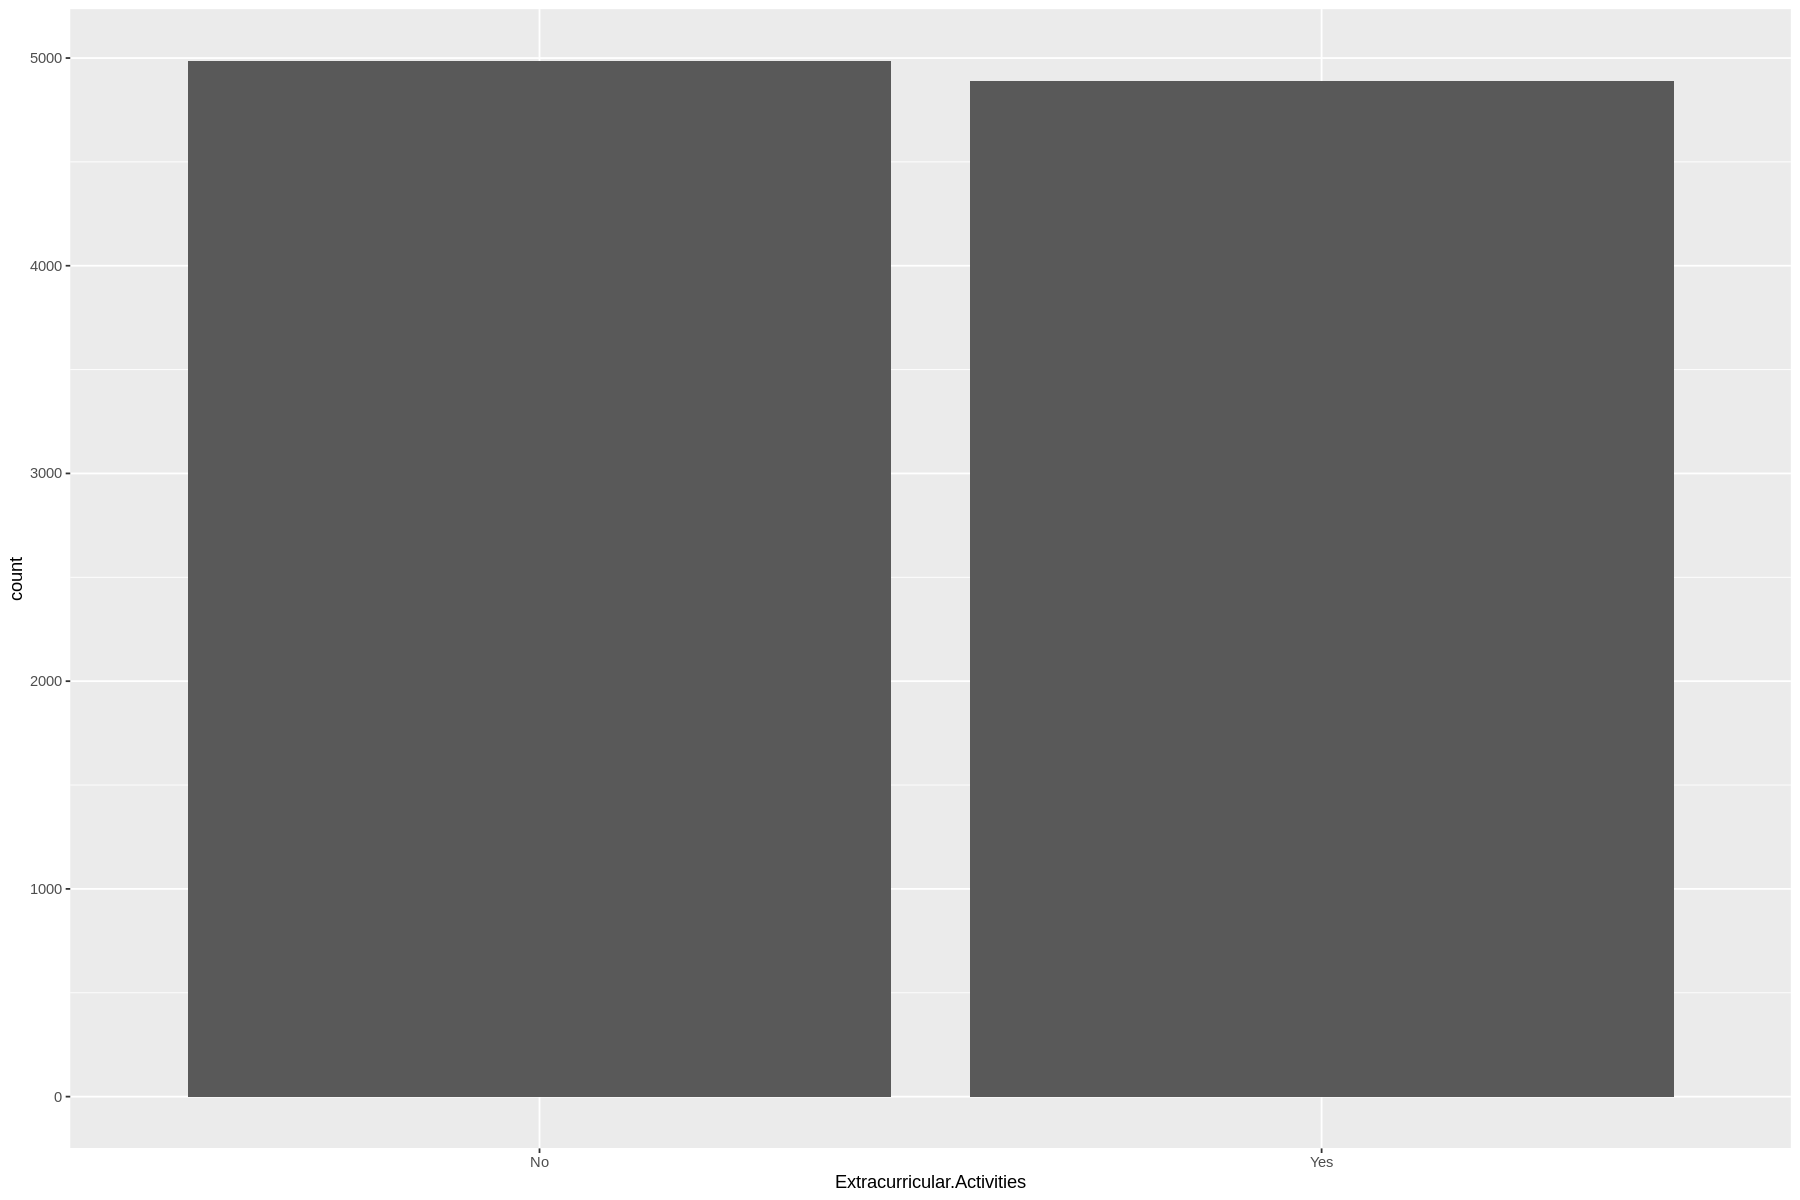

In [41]:

# Plot counts of 'Yes' and 'No'
ggplot(df, aes(x=`Extracurricular.Activities`)) +
  geom_bar()


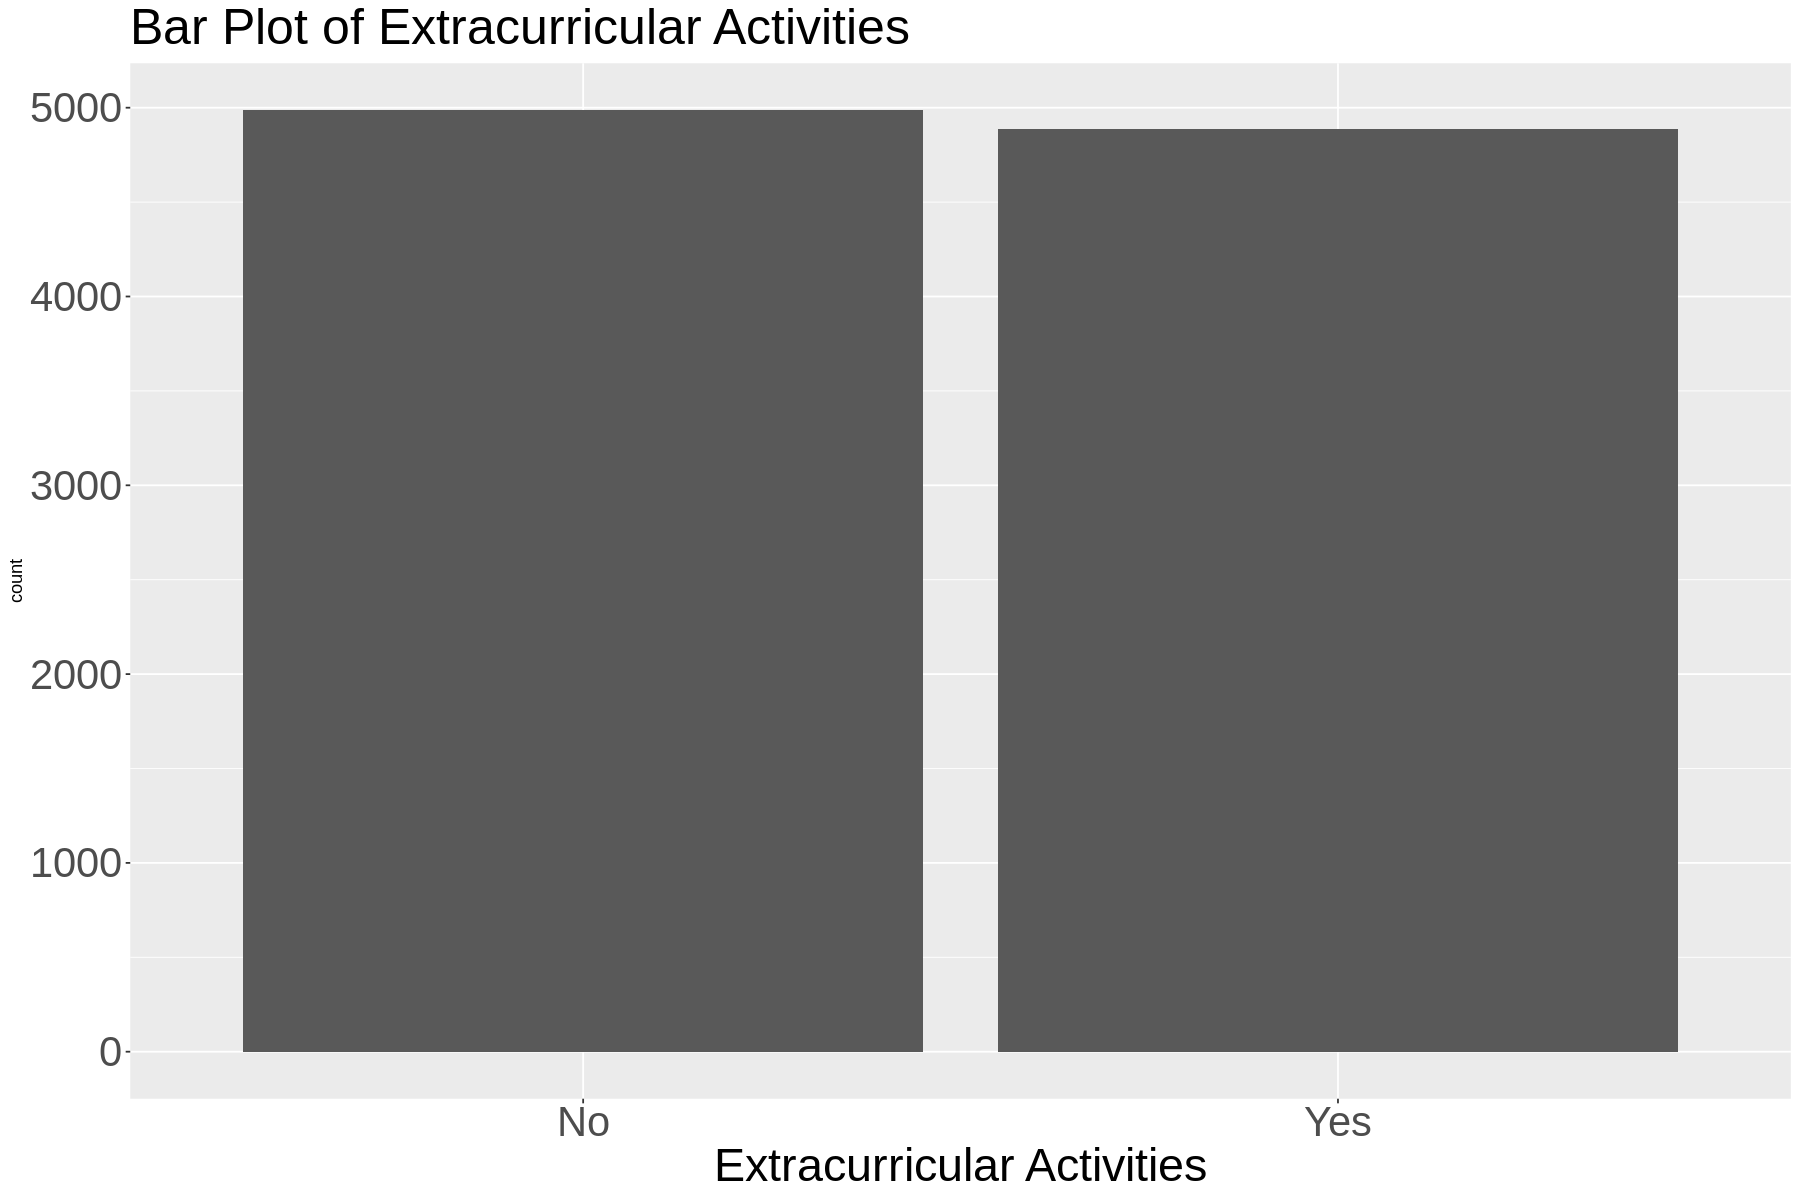

In [44]:
# Plot counts of 'Yes' and 'No'
ggplot(df, aes(x=`Extracurricular.Activities`)) +
  geom_bar() +
  xlab("Extracurricular Activities") +
  ggtitle("Bar Plot of Extracurricular Activities") +
  theme(axis.title.x = element_text(size = 28),
        plot.title = element_text(size = 30),
        axis.text = element_text(size = 25))

In [42]:

# Confidence interval calculations
Yes_Count <- df[df$`Extracurricular.Activities` == 'Yes', ]$`Performance.Index`
No_Count <- df[df$`Extracurricular.Activities` == 'No', ]$`Performance.Index`
cat("Yes proportion:", length(Yes_Count) / nrow(df), "\n")
cat("No proportion:", length(No_Count) / nrow(df), "\n")


Yes proportion: 0.4949863 
No proportion: 0.5050137 


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


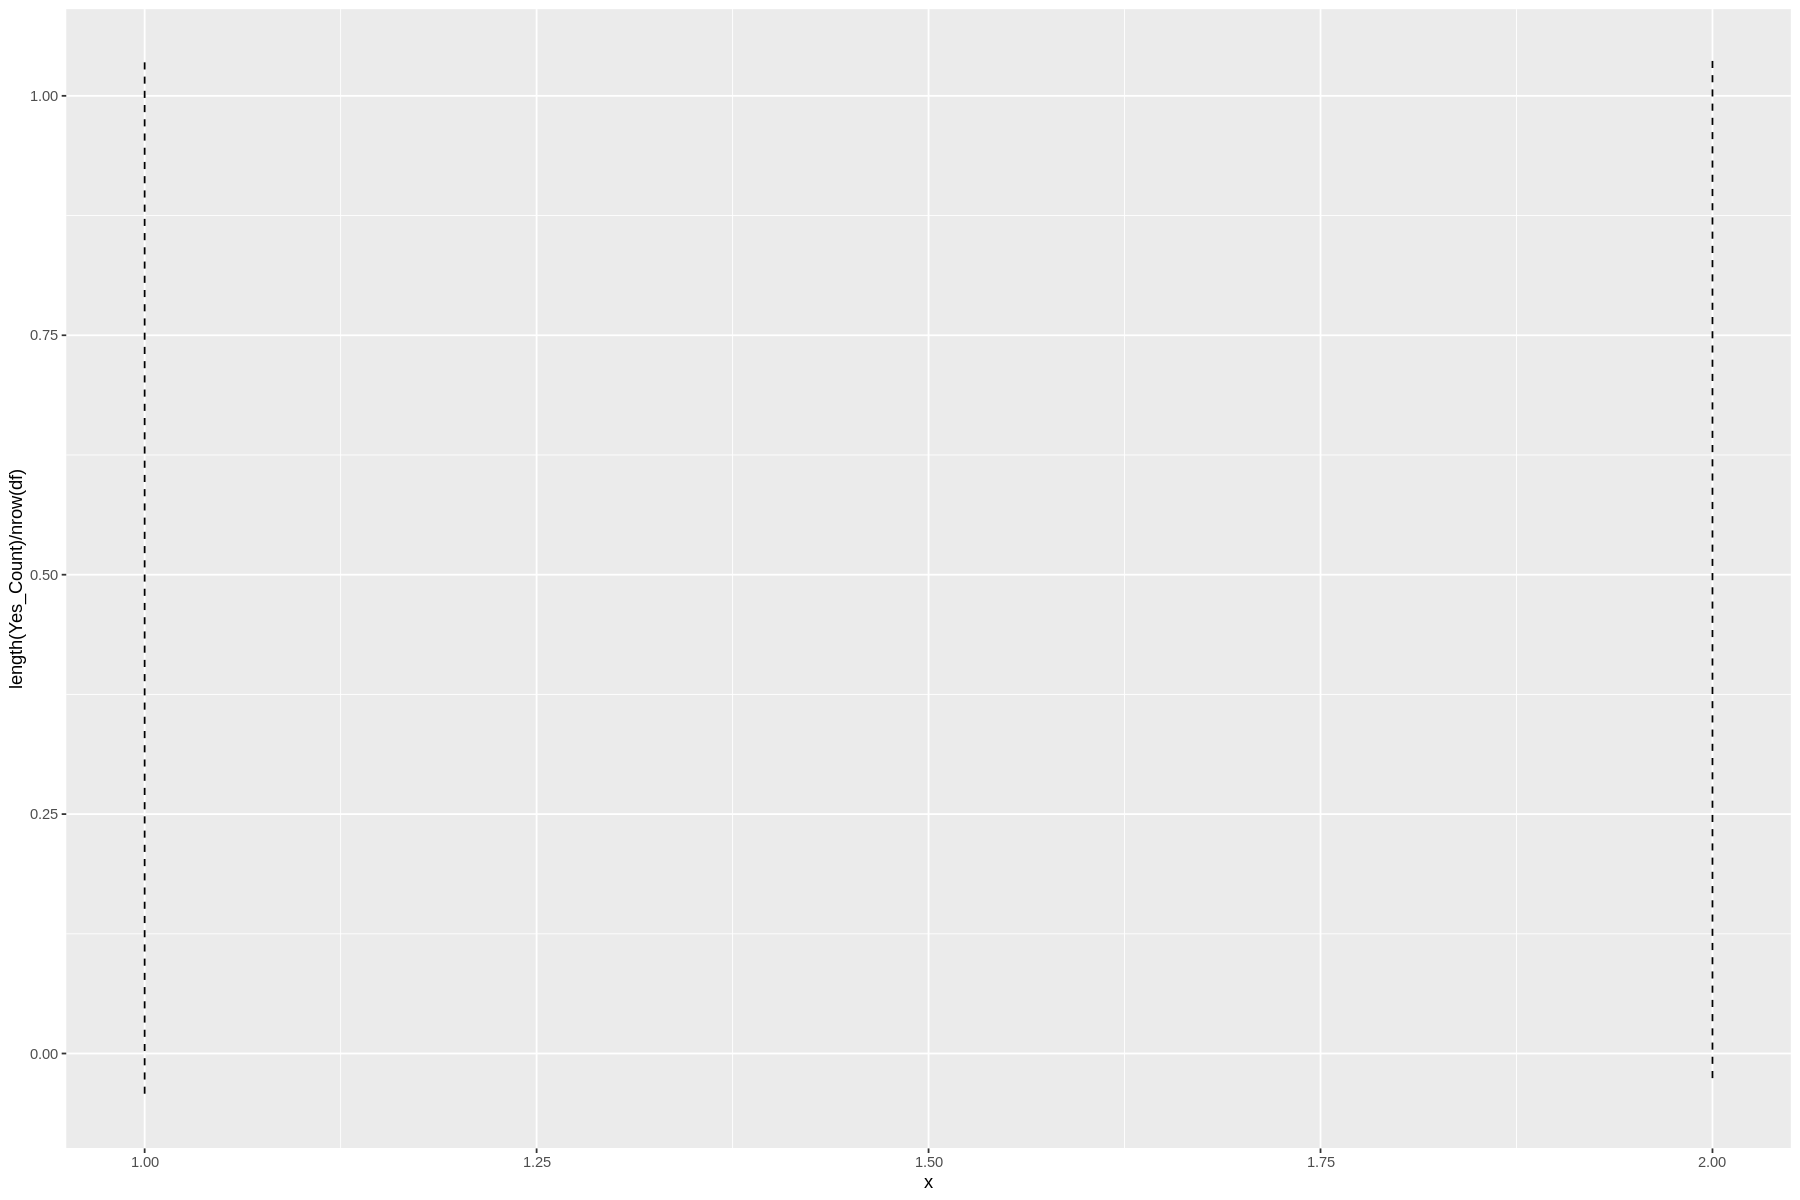

In [45]:

# Line plot with confidence intervals
ggplot() +
  geom_line(aes(x=1, y=length(Yes_Count) / nrow(df)), color='red', marker='o') +
  geom_line(aes(x=2, y=length(No_Count) / nrow(df)), color='red', marker='o') +
  geom_segment(aes(x=1, xend=1, y=length(Yes_Count) / nrow(df) + 1.96*sd(Yes_Count)/sqrt(length(Yes_Count)), yend=length(Yes_Count) / nrow(df) - 1.96*sd(Yes_Count)/sqrt(length(Yes_Count))), linetype="dashed") +
  geom_segment(aes(x=2, xend=2, y=length(No_Count) / nrow(df) + 1.96*sd(No_Count)/sqrt(length(No_Count)), yend=length(No_Count) / nrow(df) - 1.96*sd(No_Count)/sqrt(length(No_Count))), linetype="dashed")


In [46]:

# Create a new variable 'Extracurricular_Activities_New'
df$Extracurricular_Activities_New <- ifelse(df$`Extracurricular.Activities` == 'Yes', 1, 0)


In [47]:

# Explore the 'Sleep Hours' variable
X_sleep_hours <- df$`Sleep.Hours`
cat("Variable type: ", typeof(X_sleep_hours), "\n")
df$X_sleep_hours <- X_sleep_hours

Variable type:  integer 


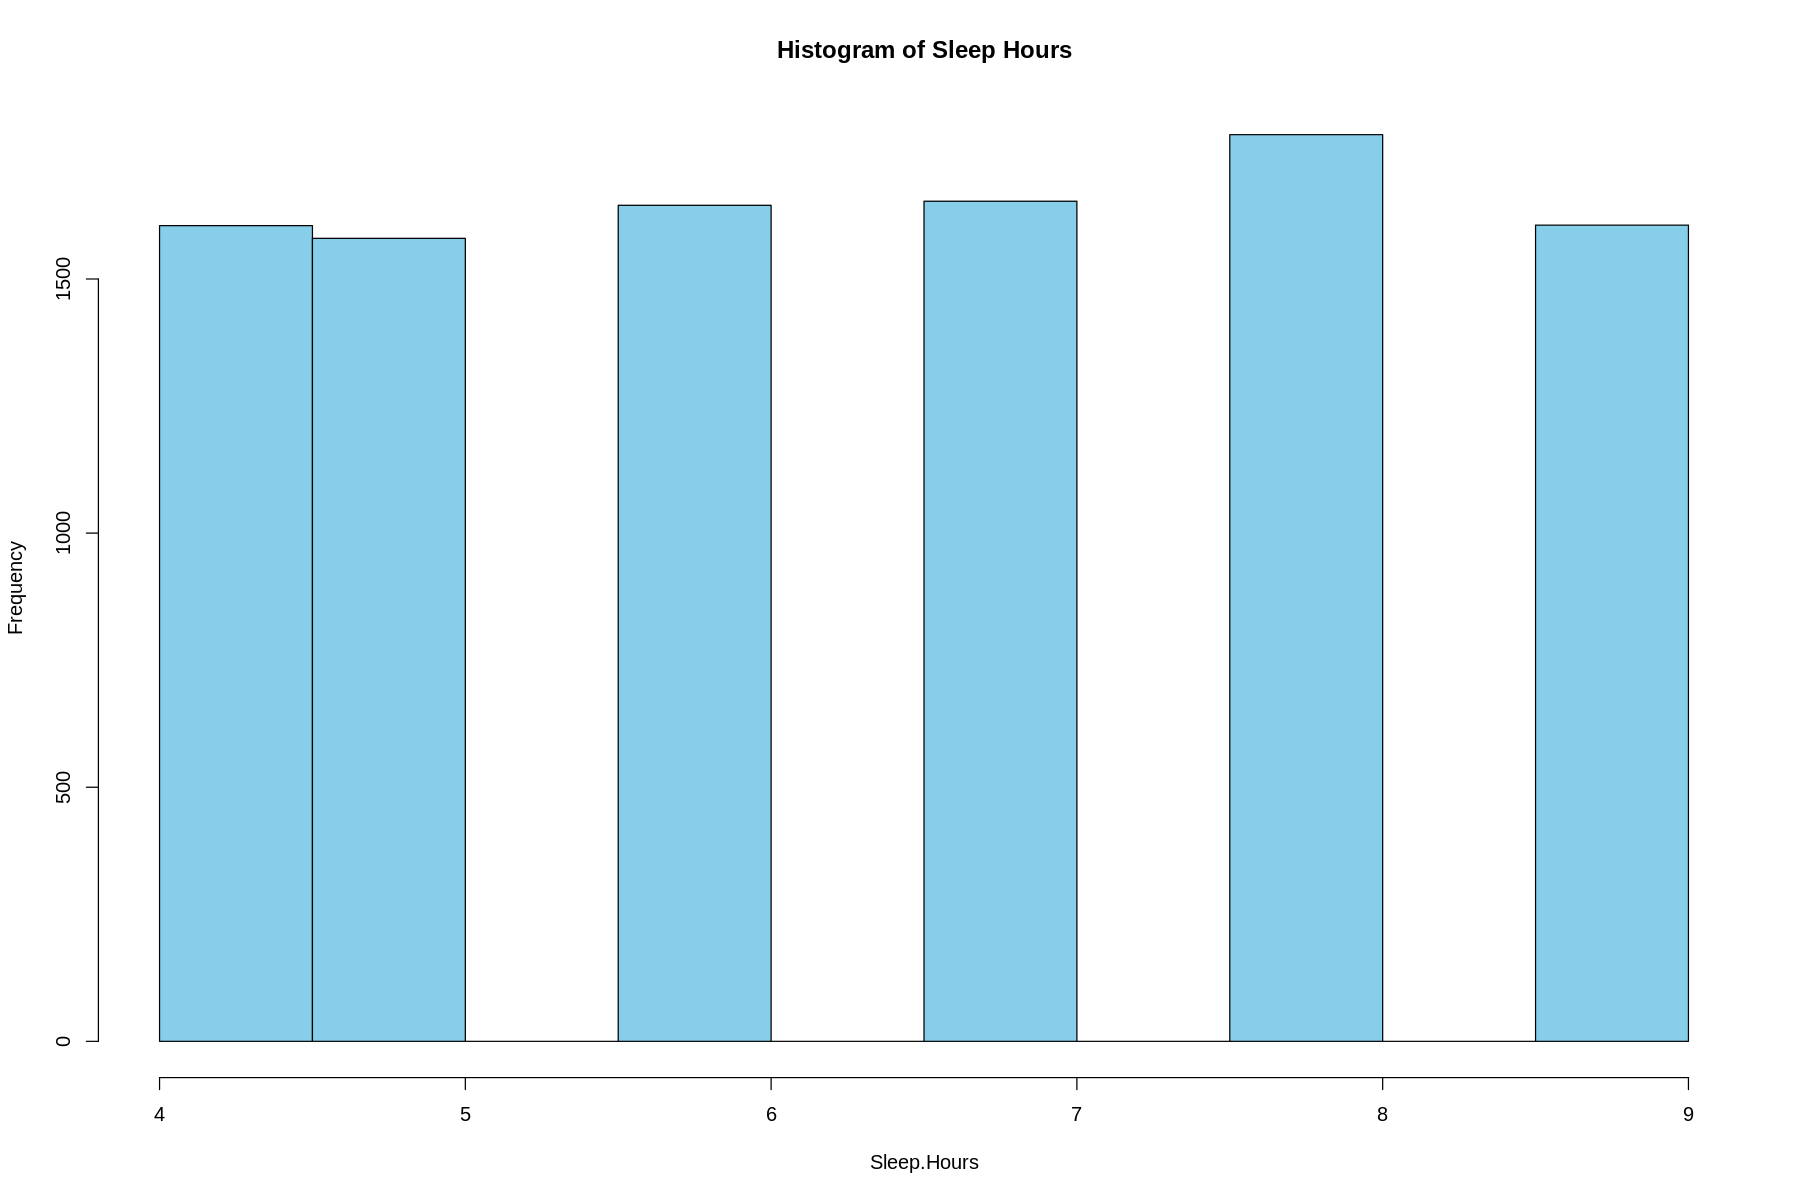

In [48]:

# Plot histogram for X_sleep_hours
hist(x=df$X_sleep_hours, main = "Histogram of Sleep Hours", xlab = "Sleep.Hours", col = "skyblue", border = "black")



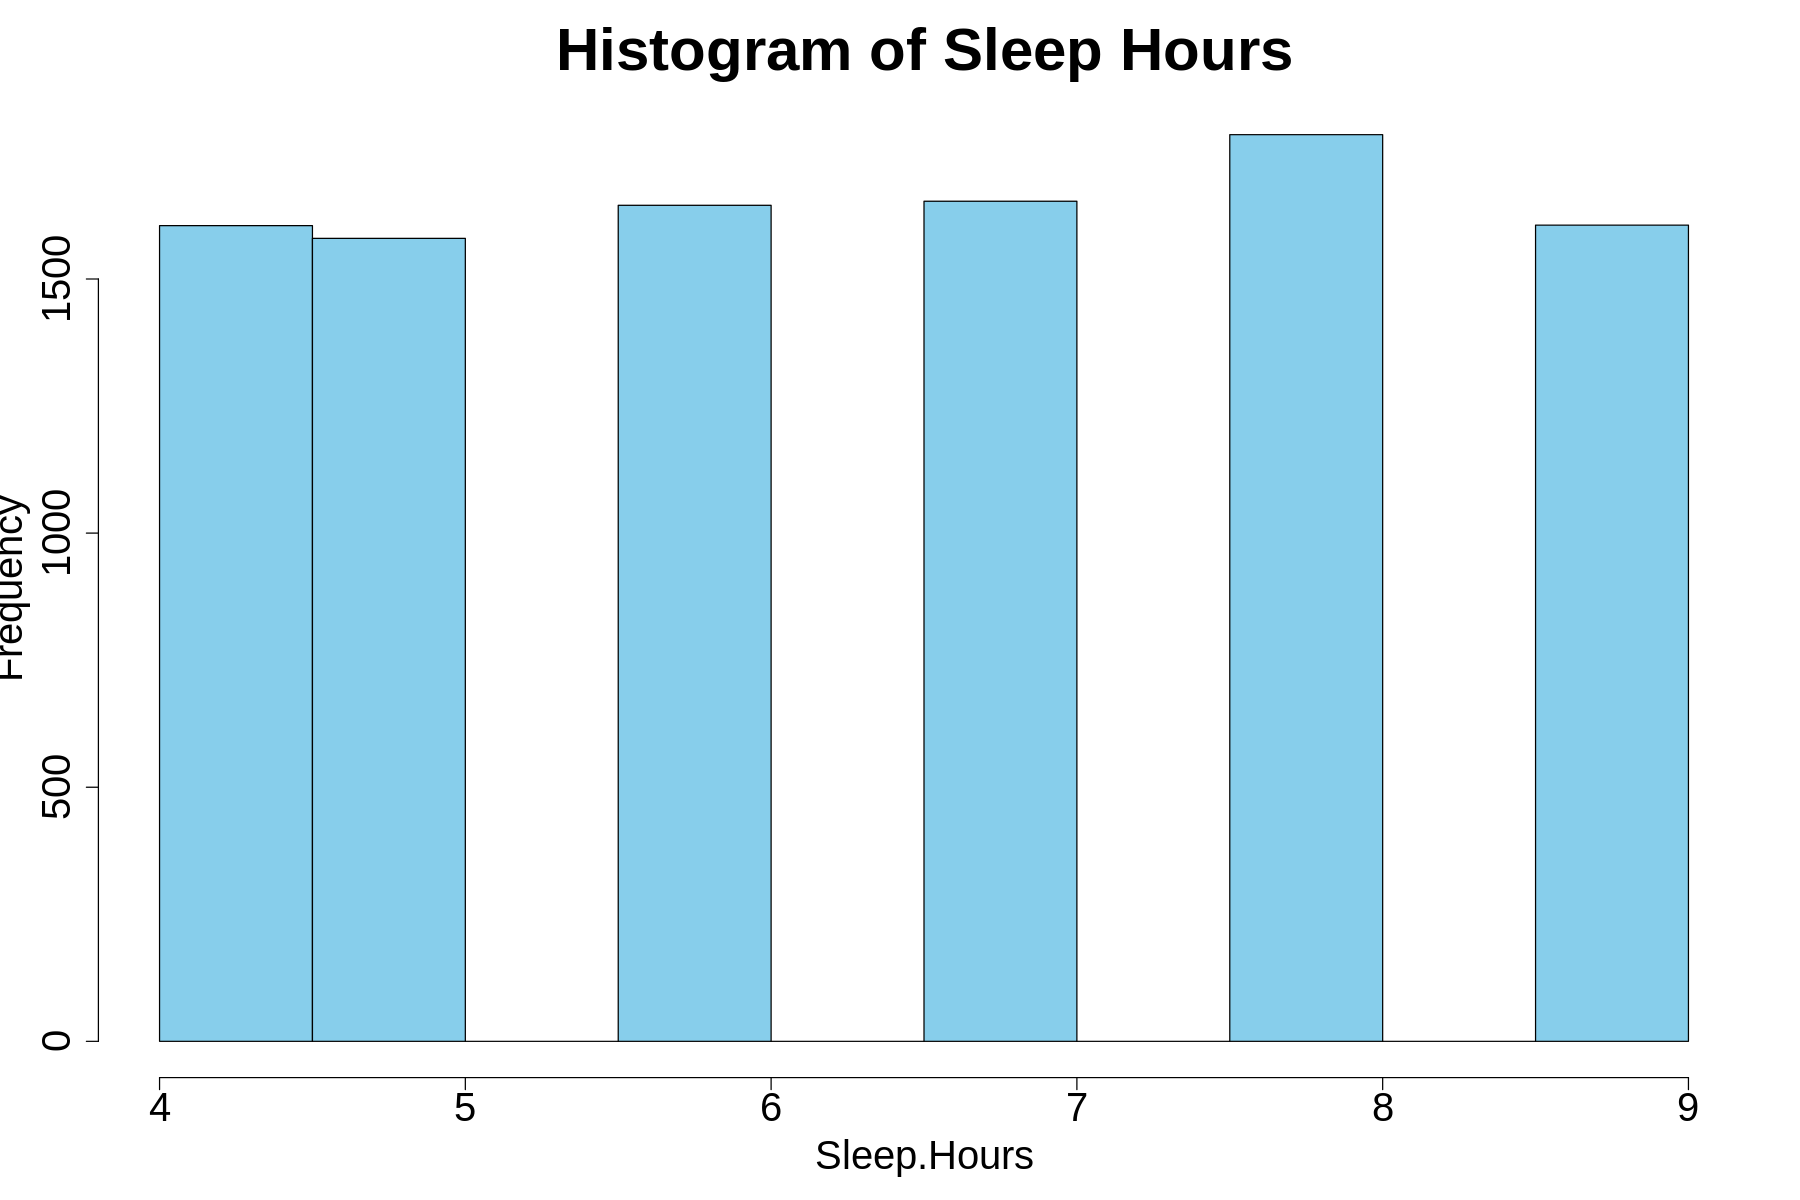

In [50]:
# Plot histogram for X_sleep_hours
hist(x=df$X_sleep_hours,
     main = "Histogram of Sleep Hours",
     xlab = "Sleep.Hours",
     col = "skyblue",
     border = "black",
     cex.main = 3,    # Tamaño del título
     cex.lab = 2,     # Tamaño de las etiquetas de los ejes
     cex.axis = 2)    # Tamaño de los números en los ejes

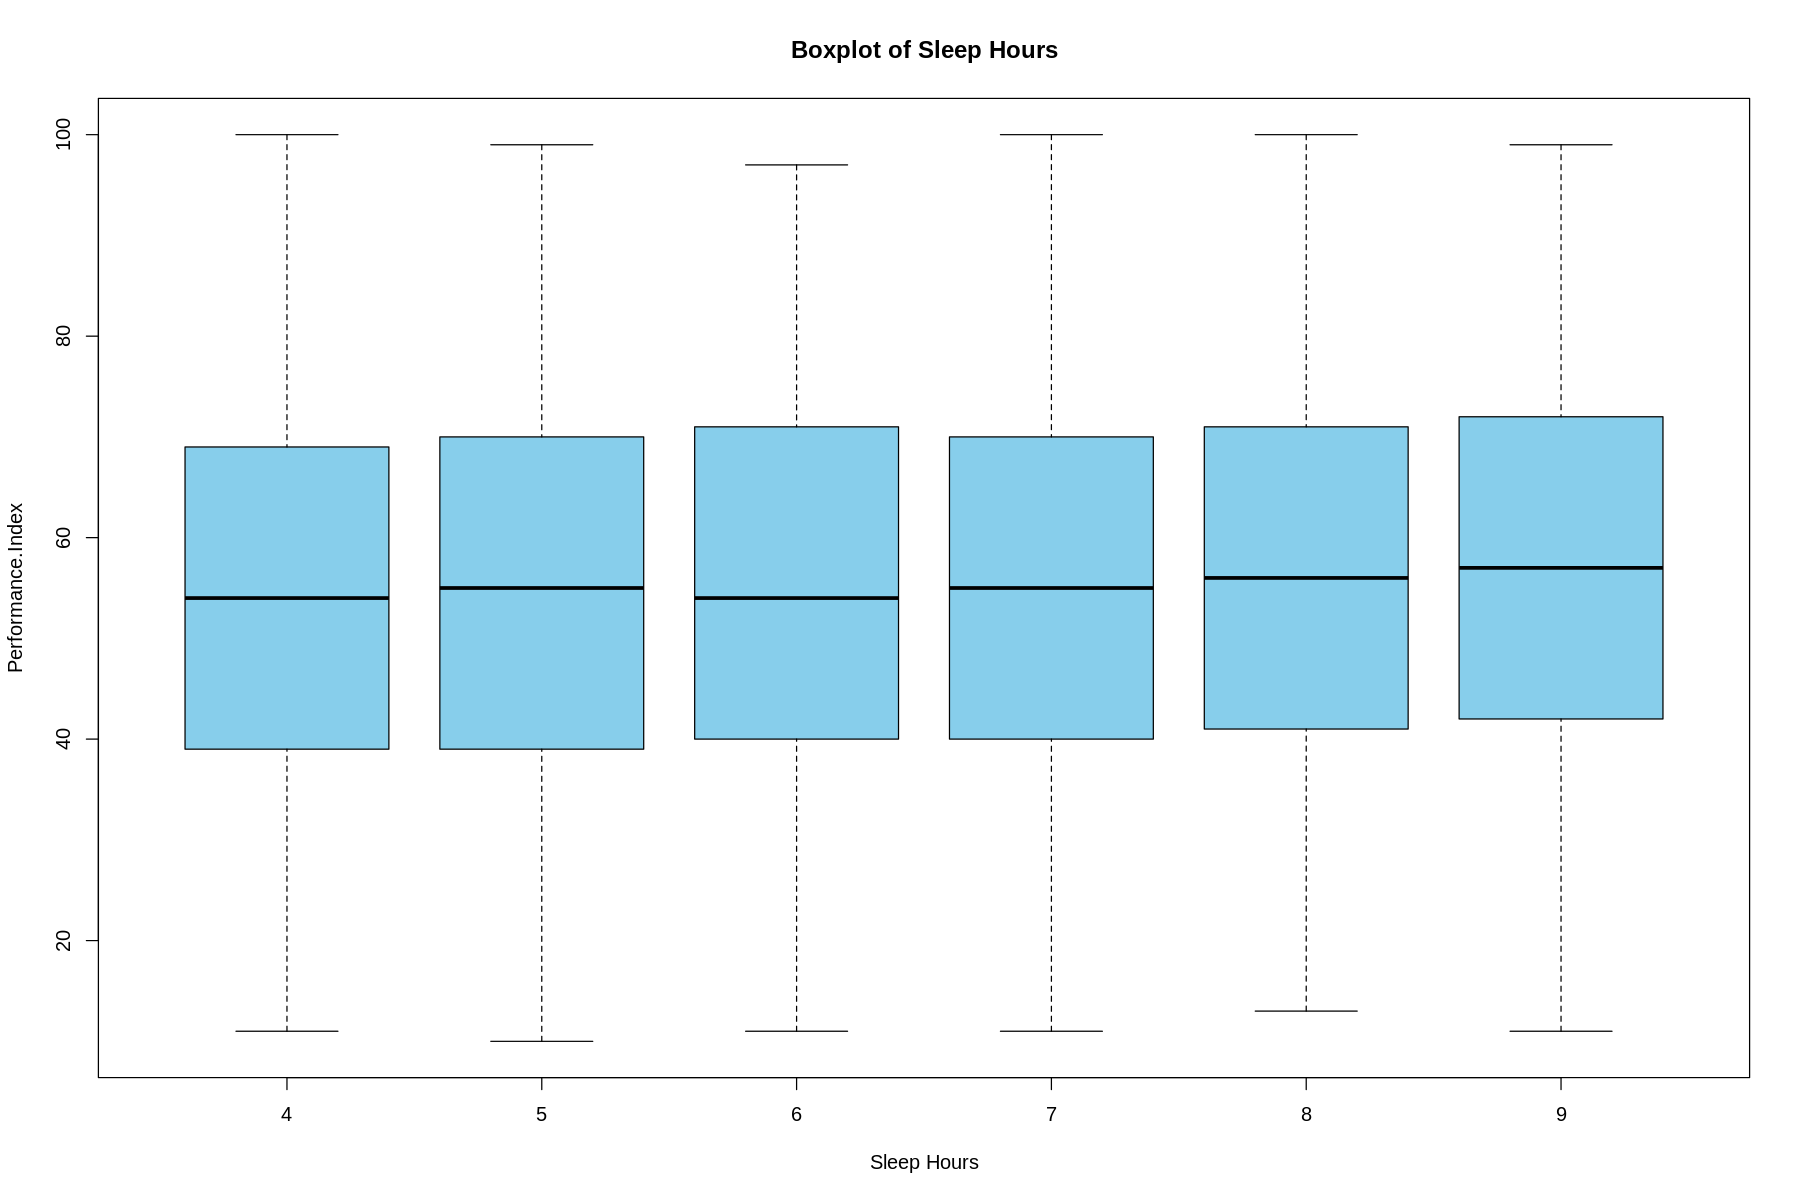

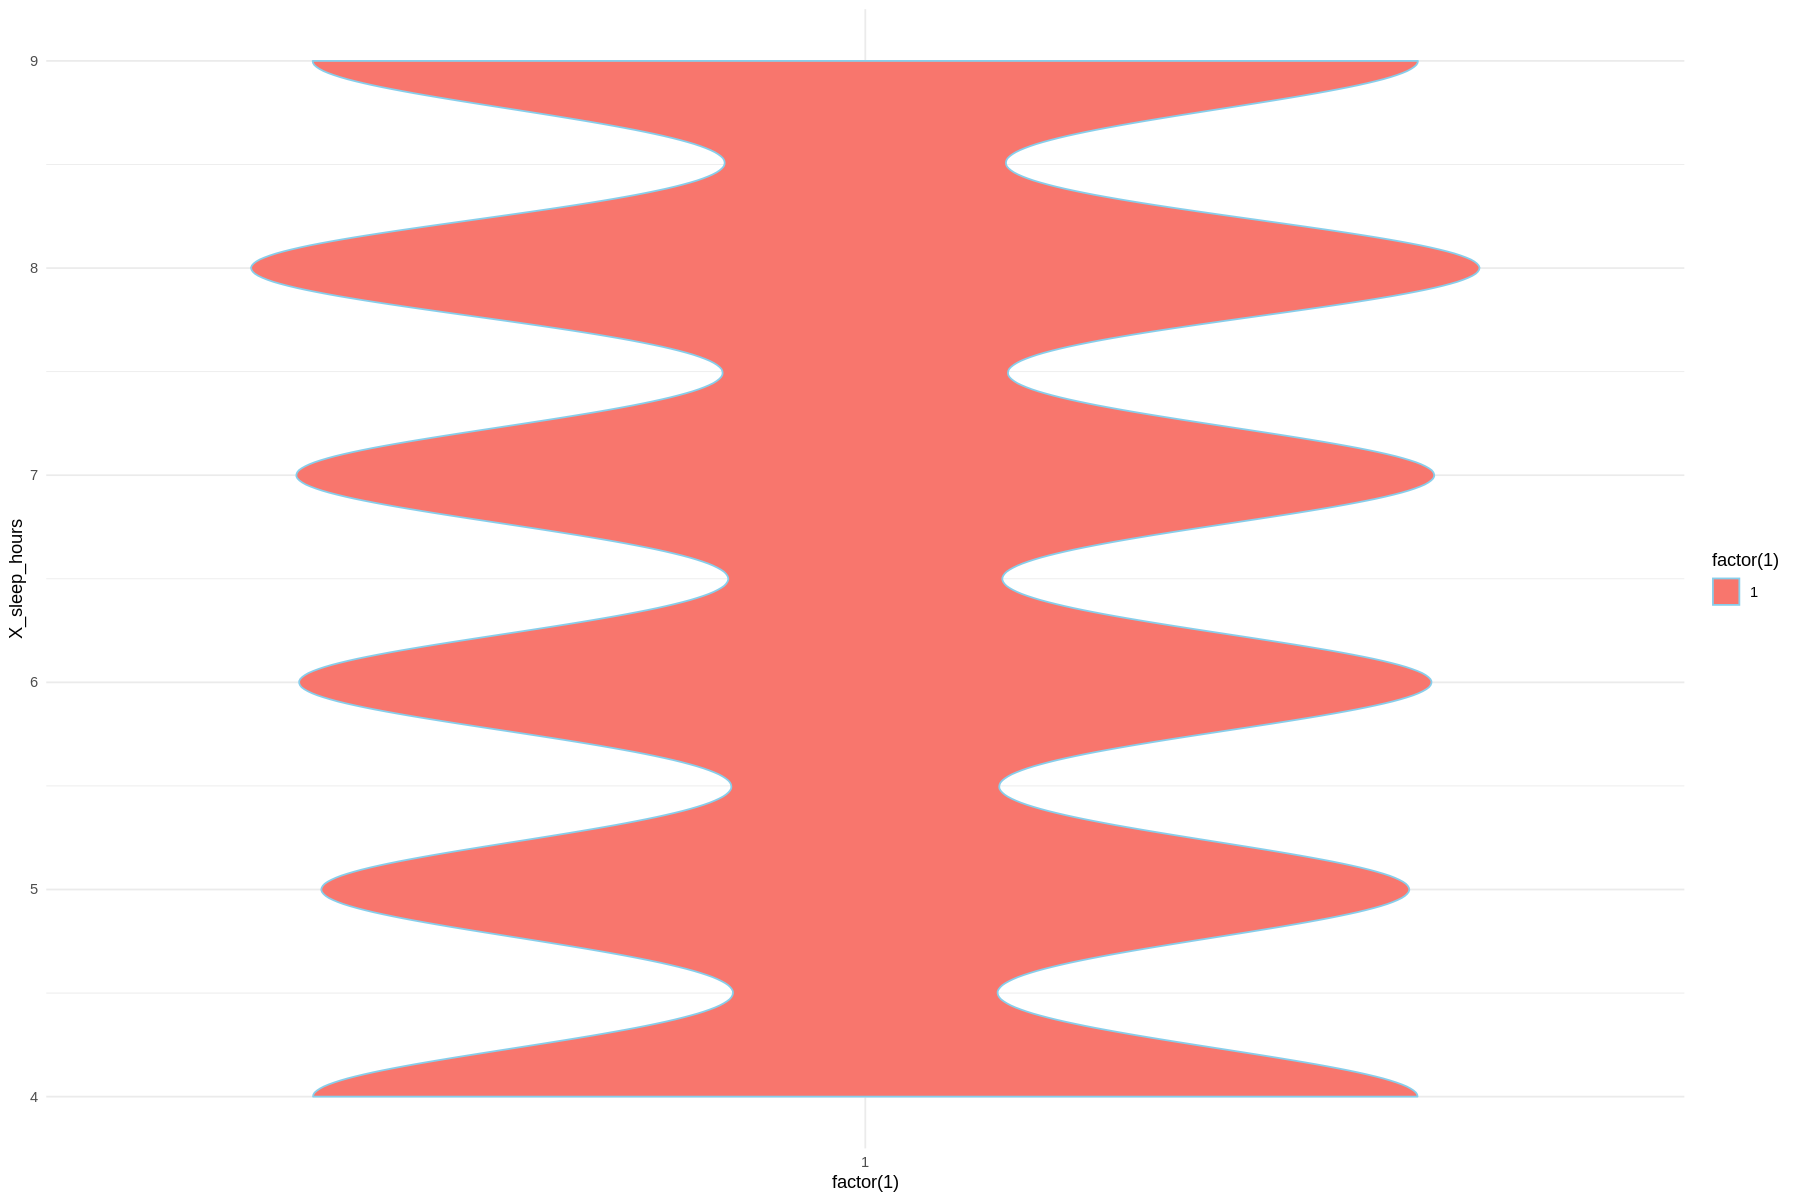

In [51]:

# Boxplot for X_sleep_hours
boxplot(Performance.Index ~ X_sleep_hours, data = df, main = "Boxplot of Sleep Hours", xlab = "Sleep Hours", col = "skyblue", border = "black")

# Violin plot for X_sleep_hours
library(ggplot2)
ggplot(df, aes(x = factor(1), y = X_sleep_hours, fill = factor(1))) +
  geom_violin(color = 'skyblue') +
  theme_minimal()



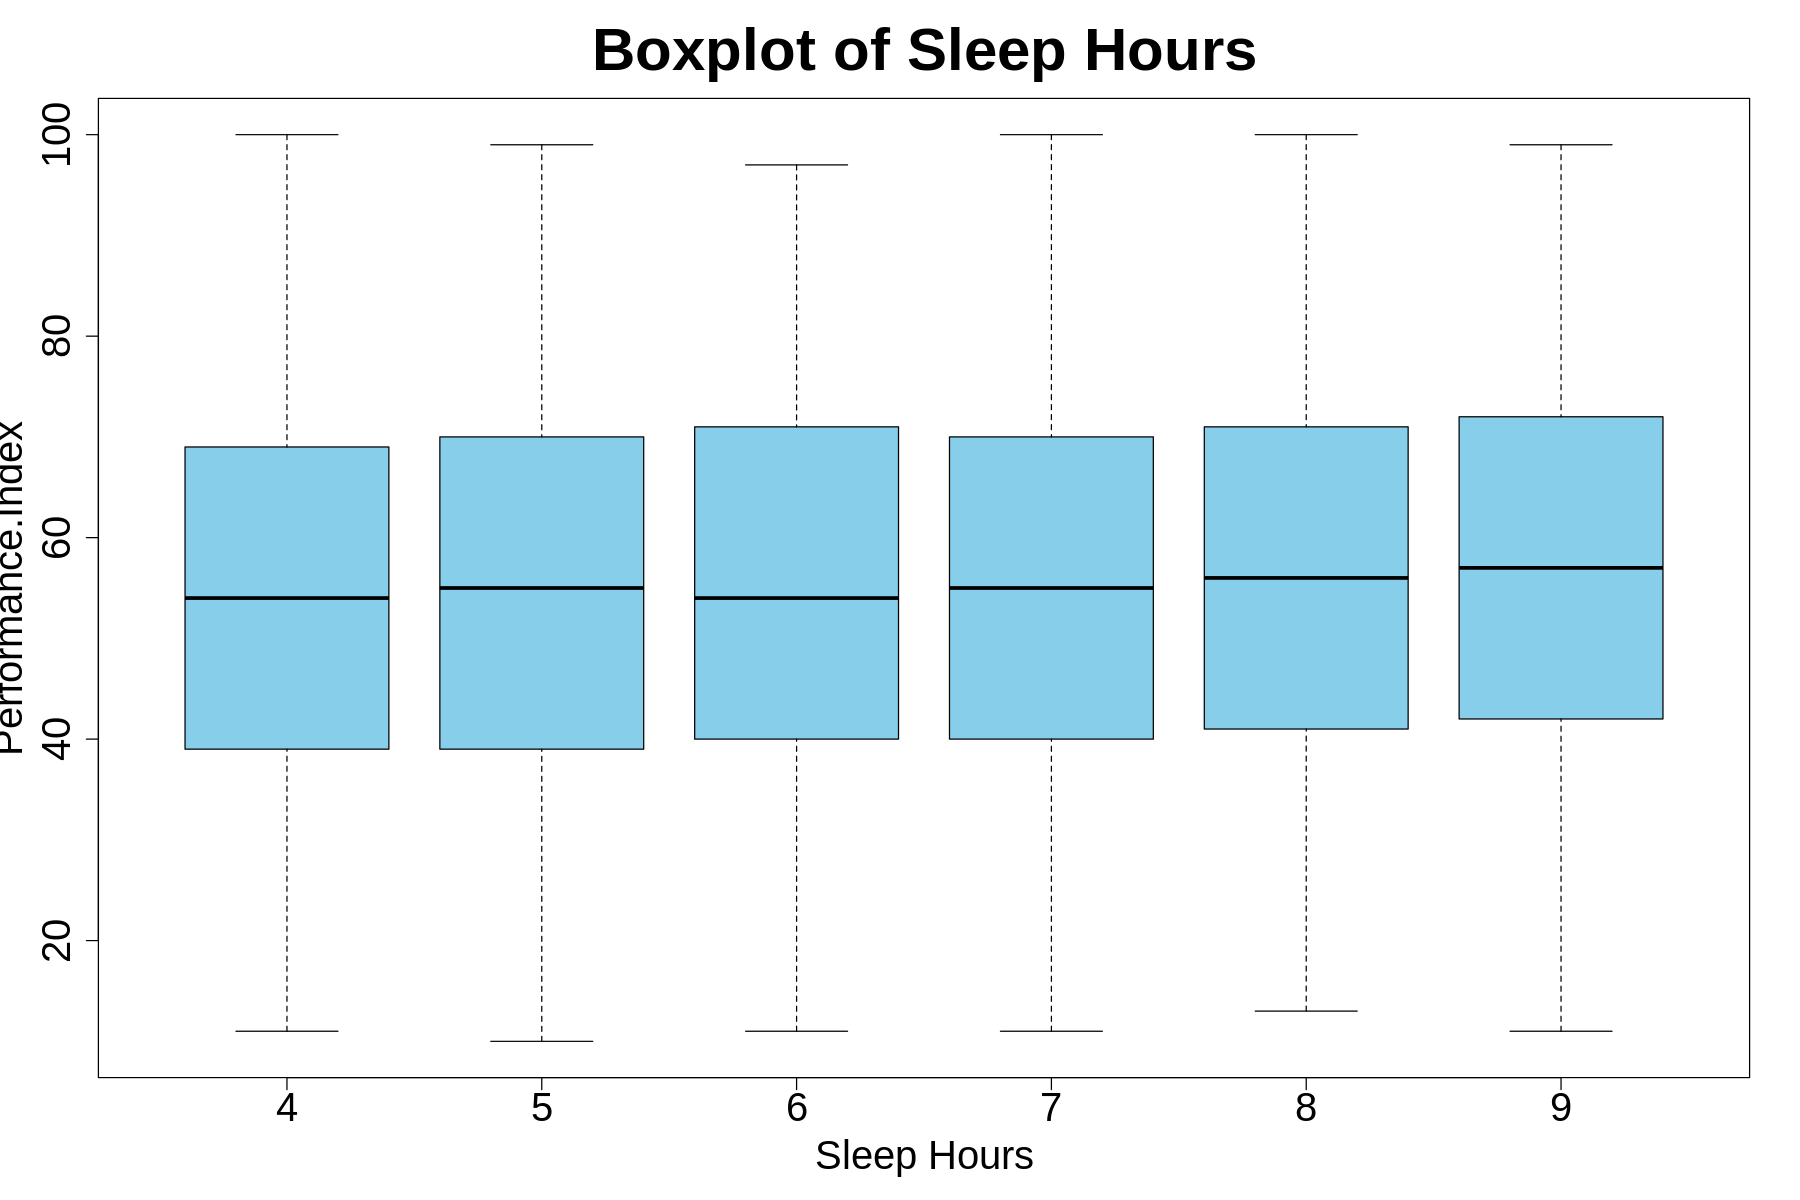

In [52]:
# Boxplot for X_sleep_hours
boxplot(Performance.Index ~ X_sleep_hours,
        data = df,
        main = "Boxplot of Sleep Hours",
        xlab = "Sleep Hours",
        col = "skyblue",
        border = "black",
        cex.main = 3,    # Tamaño del título
        cex.lab = 2,     # Tamaño de las etiquetas de los ejes
        cex.axis = 2)    # Tamaño de los números en los ejes

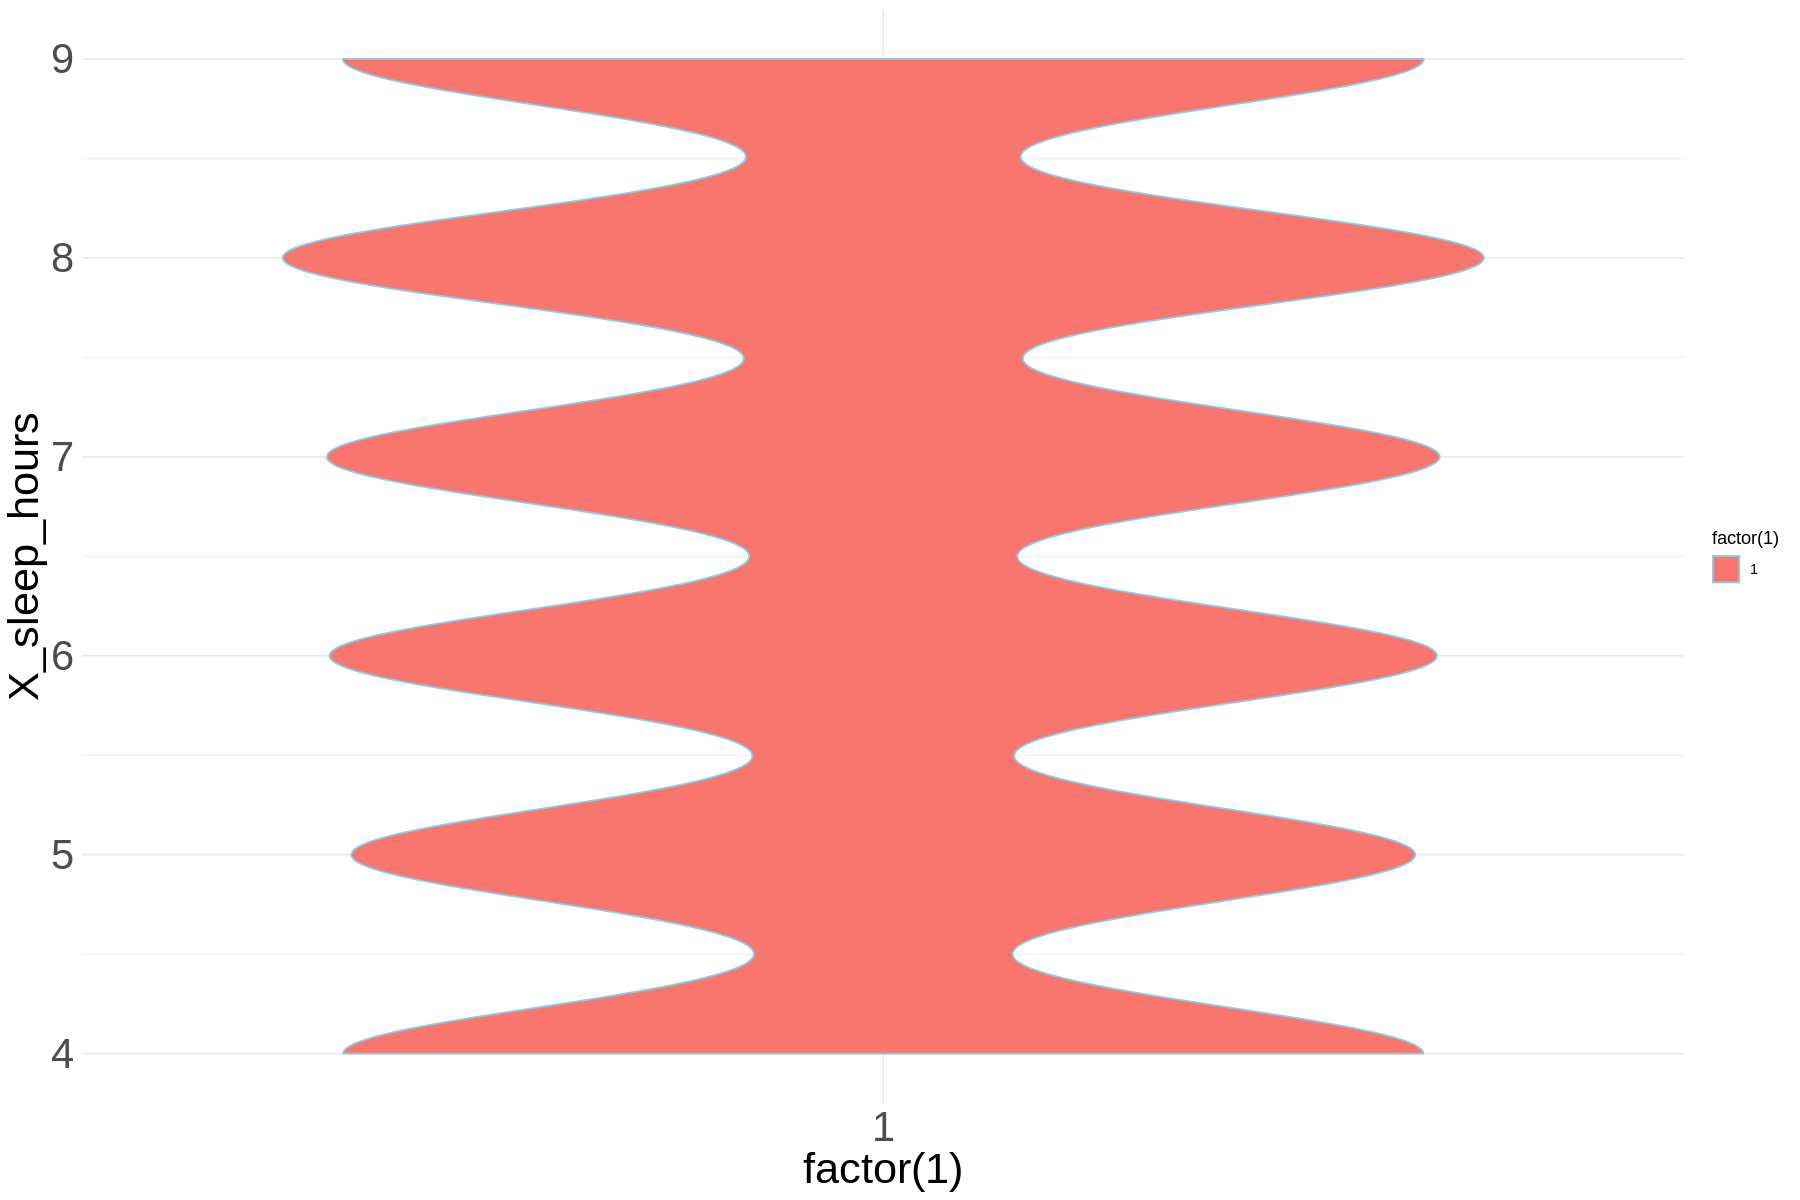

In [55]:
library(ggplot2)
ggplot(df, aes(x = factor(1), y = X_sleep_hours, fill = factor(1))) +
  geom_violin(color = 'skyblue') +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 26),
        axis.title.y = element_text(size = 26),
        plot.title = element_text(size = 30),
        axis.text = element_text(size = 25))

In [56]:

# Explore the 'Sample Question Papers Practiced' variable
X_question_papers <- df$`Sample.Question.Papers.Practiced`
cat("Variable type: ", typeof(X_question_papers), "\n")
df$X_question_papers<-X_question_papers

Variable type:  integer 


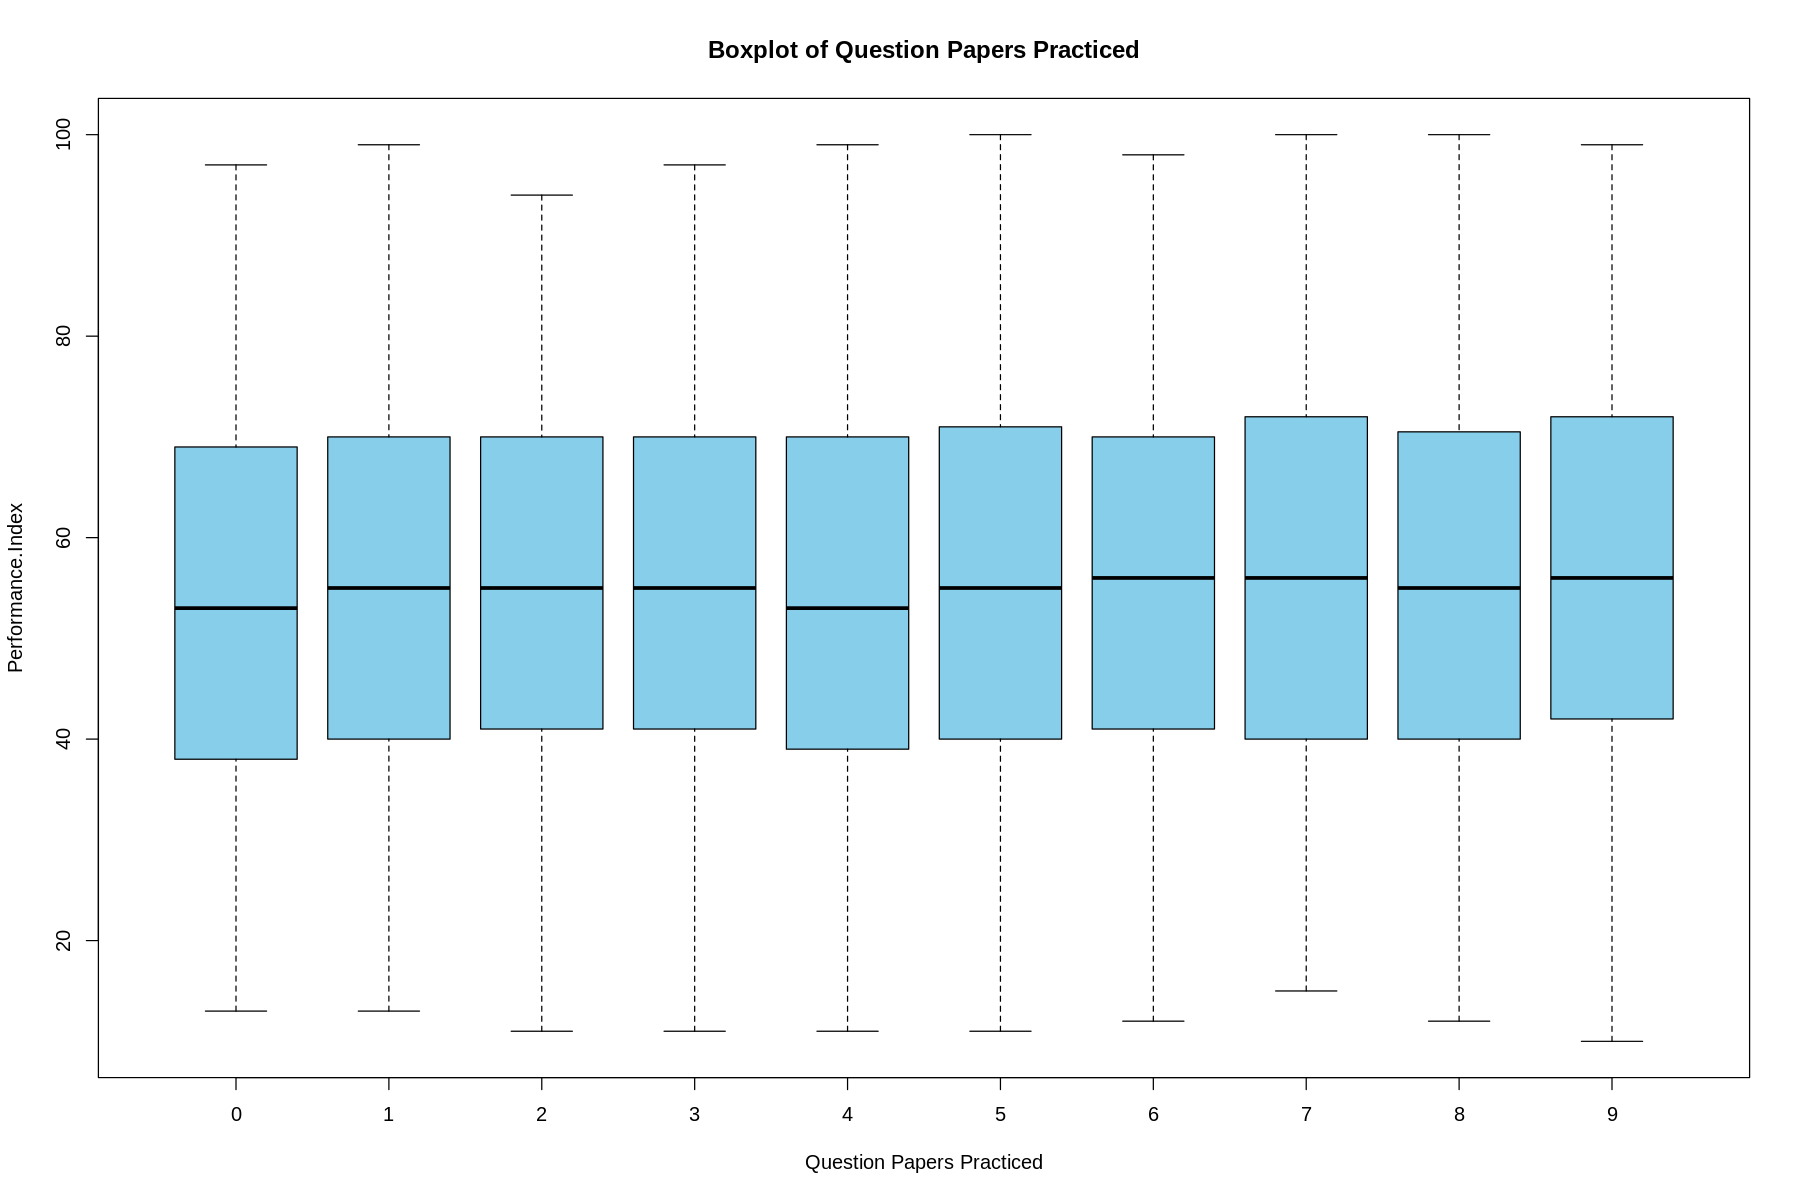

In [57]:

# Boxplot for X_question_papers
boxplot(Performance.Index ~ X_question_papers, data = df, main = "Boxplot of Question Papers Practiced", xlab = "Question Papers Practiced", col = "skyblue", border = "black")



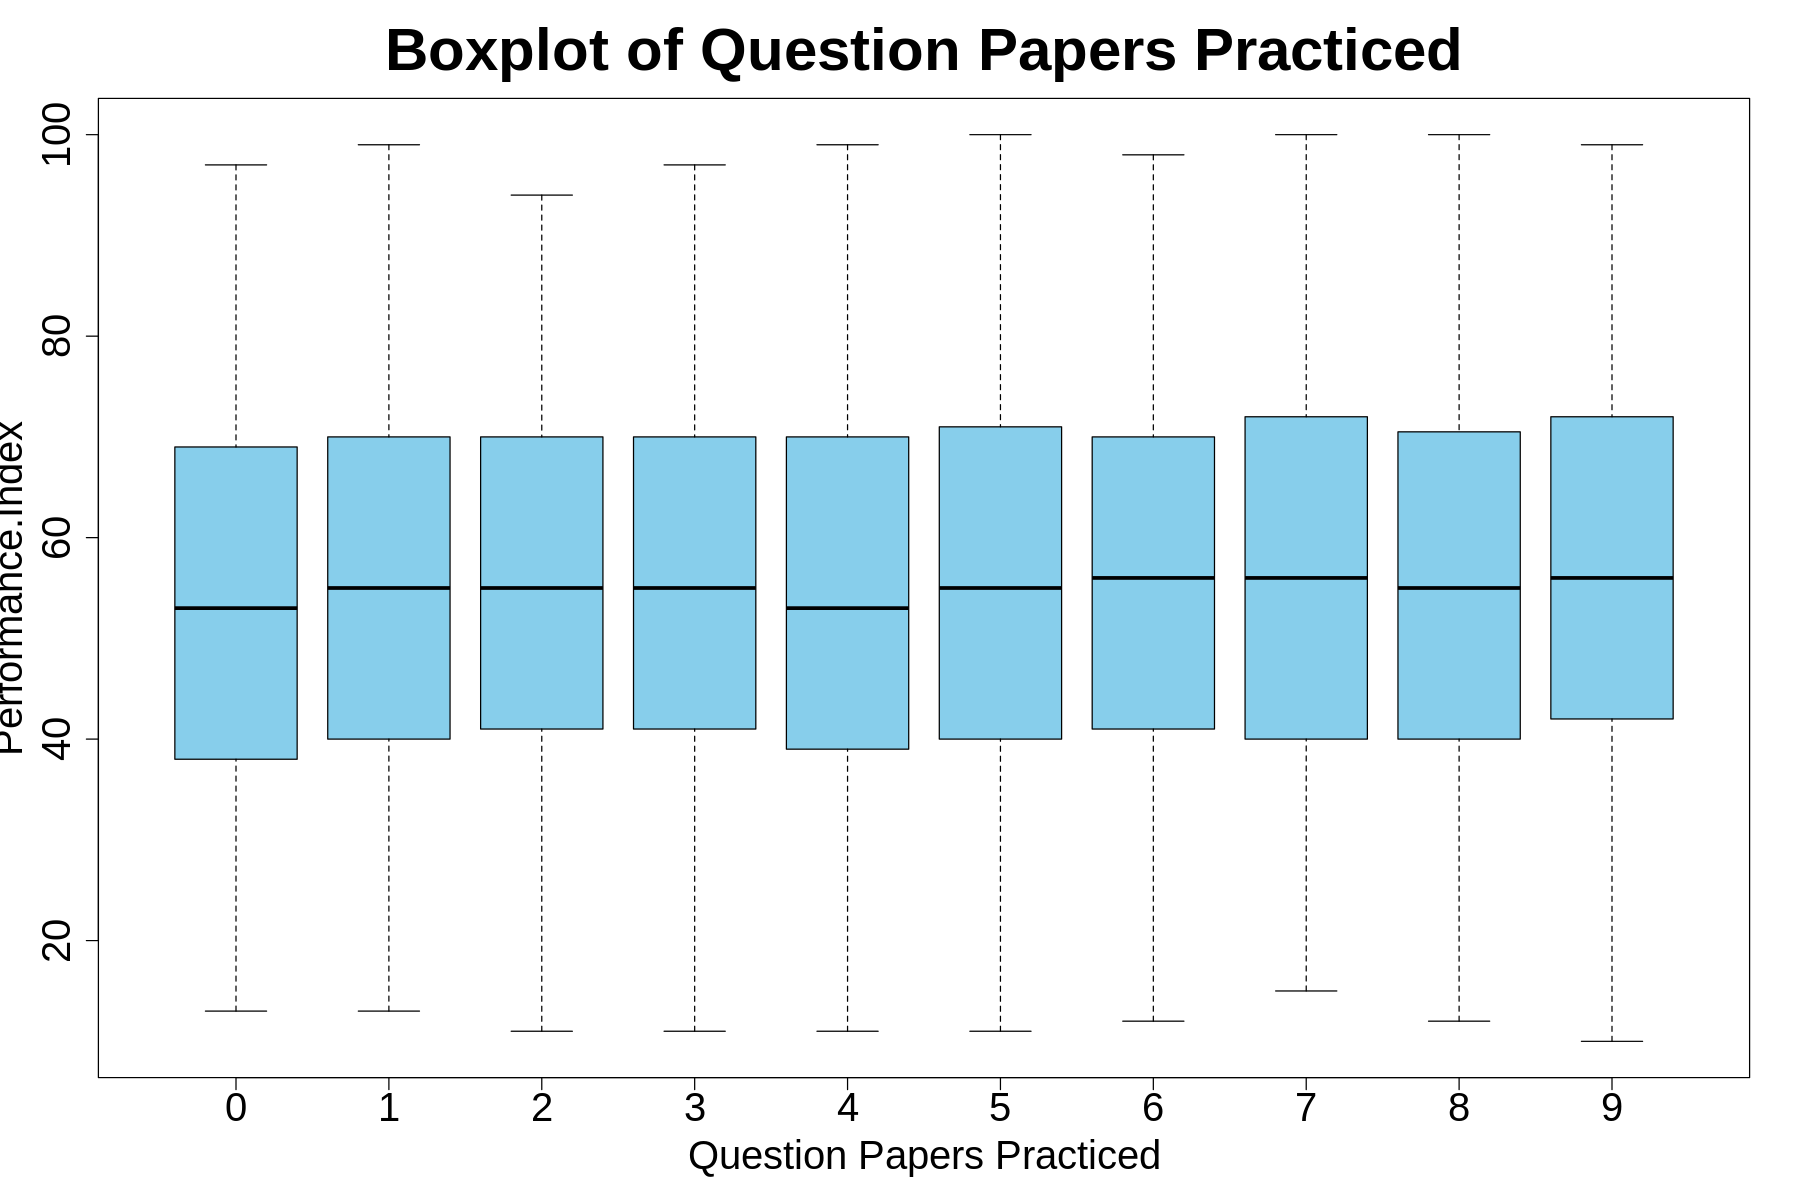

In [58]:
# Boxplot for X_question_papers
boxplot(Performance.Index ~ X_question_papers,
        data = df,
        main = "Boxplot of Question Papers Practiced",
        xlab = "Question Papers Practiced",
        col = "skyblue",
        border = "black",
        cex.main = 3,    # Tamaño del título
        cex.lab = 2,     # Tamaño de las etiquetas de los ejes
        cex.axis = 2)    # Tamaño de los números en los ejes

In [59]:

# Create feature matrix X and response variable Y
# Match the row order of the data frames

X <- data.frame(X_hours_studied, X_previous_scores,X_sleep_hours, X_question_papers)
Y <- response


In [60]:
length(X_hours_studied)

[1] 9873

In [61]:
length(X_question_papers)

[1] 9873

In [62]:

# Split the data into training and testing sets
set.seed(42)
index <- createDataPartition(Y, p=0.7, list=FALSE)
X_train <- X[index, ]
Y_train <- Y[index]
X_test <- X[-index, ]
Y_test <- Y[-index]


In [63]:

# Train Ridge regression model
library(glmnet)
ridge_model <- cv.glmnet(as.matrix(X_train), Y_train, alpha=0)


In [64]:

# Print the R-squared score on the test set
ridge_model$glmnet.fit$dev.ratio[which.min(ridge_model$glmnet.fit$dev.ratio)] # This line shows the R-squared score

[1] 1.979095e-36